# Computational Profiling Reveals Age- and MDS-Related Changes in Hematopoietic Stem and Progenitor Cell Kinetics
## Results fit model union_ABDGI
#### author: Lisa Bast

#### call defined functions:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.patches as patches
from matplotlib.patches import Ellipse
from matplotlib import rc
from matplotlib.pyplot import figure
from matplotlib.ticker import FuncFormatter
import matplotlib.transforms as transforms
import matplotlib.style
import scipy.io as sio
import fnmatch as fnm
import h5py
import math
import os
import re
import statsmodels.formula.api as sm
from statsmodels.stats.weightstats import DescrStatsW
from scipy import stats
from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler
import random
%matplotlib inline

#### specify colors and cell type compartments

In [2]:
np.set_printoptions(precision=4)
sns.set()
sns.set(style="whitegrid")

CT = ['HSC','MPP','MLP','CMP','GMP','MEP','mat']
cols_CT = sns.color_palette(['#CC0000','#FF8000','#003366','#6600CC','#00994C','#57D7F7','#FFE00E','#A0A0A0']);

#colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
col_H = '#000000'#FFFFFF'
#col_H = '#194795'
col_H_light = '#0F2F66'
col_H_y = '#57B8F9'
col_H_y_light = '#279DEC'
col_H_a = '#194795'
col_H_a_light = '#0F2F66'

col_MDS = '#C61D1D'
#col_MDS = '#C61D1D'
col_MDS_light = '#791010'
col_MDS_m1 = '#FD8002'
col_MDS_m2 = '#AD07E3'
col_MDS_m3 = '#FF0000'
col_MDS_m4 = '#FF3399'
col_MDS_m5 = '#813434'
col_MDS_m6 = '#FF0010'
col_MDS_m7 = '#813437'
col_MDS_m8 = '#834537'

col_CHIP = '#F09999'
#col_CHIP = '#009999'
col_CHIP_light = '#00FFFF'

cols_H_vs_MDS = sns.color_palette([col_H,col_MDS])
cols_H_vs_MDS_light = sns.color_palette([col_H_light,col_MDS_light])
cols_H_vs_MDS_mut = sns.color_palette([col_H,col_MDS,col_MDS_m1,col_MDS_m2,col_MDS_m3,col_MDS_m4,col_MDS_m5,col_MDS_m6,col_MDS_m7,col_MDS_m8])

cols_H_y_vs_MDS = sns.color_palette([col_H_y,col_MDS])
cols_H_y_vs_MDS_light = sns.color_palette([col_H_y_light,col_MDS_light])

cols_H_vs_CHIP_vs_MDS = sns.color_palette([col_H,col_CHIP,col_MDS])
cols_H_vs_CHIP_vs_MDS_light = sns.color_palette([col_H_light,col_CHIP_light,col_MDS_light])

cols_H_y_vs_H_a = sns.color_palette([col_H_y, col_H_a])
cols_H_y_vs_H_a_light = sns.color_palette([col_H_y_light, col_H_a_light])

cols_H_y_vs_H_a_vs_MDS = sns.color_palette([col_H_y, col_H_a, col_MDS])
cols_H_y_vs_H_a_vs_MDS_light = sns.color_palette([col_H_y_light, col_H_a_light, col_MDS_light])

cols_status_3 = sns.color_palette([col_H_y_light,col_H_a_light,col_MDS_light])
cols_status_light_3 = sns.color_palette([col_H_y,col_H_a,col_MDS])

cols_BMtype_3 = sns.color_palette(['#009999','#99004C','#CC6600'])
cols_BMtype_light_3 = sns.color_palette(['#00FFFF','#FF007F','#FF9933'])


#### specify path were results can be found and figures should be saved 

In [3]:
#os.chdir('../')

In [4]:
#os.chdir('./Python/results_visualization/')

In [5]:
dir_str = os.getcwd()

In [6]:
dir_str

'D:\\Documents\\MATLAB\\HematopoieticDisorderAnalysis\\Python\\results_visualization'

#### specify if figures should be saved

In [7]:
opt_save = True

#### load defined functions

In [8]:
os.chdir(dir_str)
#os.getcwd()
%run "definedFunctions.ipynb"

#### set general graphic settings

In [9]:
plt = loadPltSettings(40,10) #fonsize, markersize

#### specify MATLAB results subfolders 

In [10]:
bool_fit_repetitions_seperately=False
if bool_fit_repetitions_seperately:
    opt_sample_ID = 'long'
else:
    opt_sample_ID = 'short'
#opt_sample_ID = 'simplyfied'#'short' #'long'
folder_str_H_MDS = []
folder_str_H_MDS.append("/results_fit_samples_7divs_3iS_HO_LogNormal_fit_iC/")

subfolder_str_H_MDS = []
subfolder_str_H_MDS.append("model_union_ABDGI/")

M_names_sim = subfolder_str_H_MDS[0][6]
M_names_opt = subfolder_str_H_MDS[0][6]

if bool_fit_repetitions_seperately==False:
    I_names_H =['353','657','311','380','791','607','312','559','345','391','560', '561', '348', '552', '775']
    #I_names_H =['311','312','345','348','353','370','380','391','439','482','500','508','519','520','522','547','552','559','560','561','607','657','775','791'] #old order
    
    I_names_MDS = ['373','326','360','227','135','354','279','377','140','620']
    #I_names_MDS = ['227','373','326','360','135','354','140','279','377','620'] #old order
    I_names = I_names_H+I_names_MDS
else:
    print('This is not implemented!')
last_subsubfolder_str=list()
last_subsubfolder_str.append("individual_"+I_names_H[len(I_names_H)-1])
last_subsubfolder_str.append("individual_"+I_names_MDS[len(I_names_MDS)-1])

#call individuals_str from .mat file within par plot
subsubfolder_str_H_MDS = []
for I_ID in I_names:
    subsubfolder_str_H_MDS.append("individual_"+I_ID) 

samples_excluded_MDS = ["110","433","173","215","460","545","592"]
samples_excluded_H = ['450','425','729','754']#["391"]

In [11]:
len(I_names_MDS)

10

In [12]:
subfolder_str_H_MDS

['model_union_ABDGI/']

In [13]:
last_subsubfolder_str

['individual_775', 'individual_620']

In [14]:
len(I_names_H)

15

### Parameter and confidence intervals

In [15]:
#os.chdir('../')
#os.getcwd()
#matlab_dir_str = os.getcwd()

In [16]:
os.chdir('../')
os.chdir('../')
os.chdir('./MATLAB/parameter_inference/')
matlab_dir_str = os.getcwd()

In [17]:
matlab_dir_str

'D:\\Documents\\MATLAB\\HematopoieticDisorderAnalysis\\MATLAB\\parameter_inference'

In [18]:
os.chdir(dir_str)
#os.getcwd()
%run "definedFunctions.ipynb"

In [19]:
M_names_opt

'u'

In [20]:
subfolder_str_H_MDS

['model_union_ABDGI/']

a_HSC_MPP down-regulated in: H559,C775,MDS135
a_HSC_MEP up-regulated in: C560,C348,MDS360,MDS279,MDS377,MDS140
a_HSC_mat up-regulated in: MDS326,MDS377,MDS140,MDS620
b_HSC up-regulated in: MDS326,MDS354
a_MPP_MLP up-regulated in: MDS354
b_MPP up-regulated in: C391,C552,MDS326,MDS354
b_MPP down-regulated in: MDS135
g_MPP up-regulated in: C391,C552,MDS326,MDS227,MDS354,MDS620
a_MLP up-regulated in: MDS360
b_GMP down-regulated in: C775,MDS135,MDS354,MDS140
b_mat up-regulated in: MDS354
b_mat down-regulated in: MDS135
g_mat up-regulated in: MDS326,MDS354


C:\Users\PowerWS\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


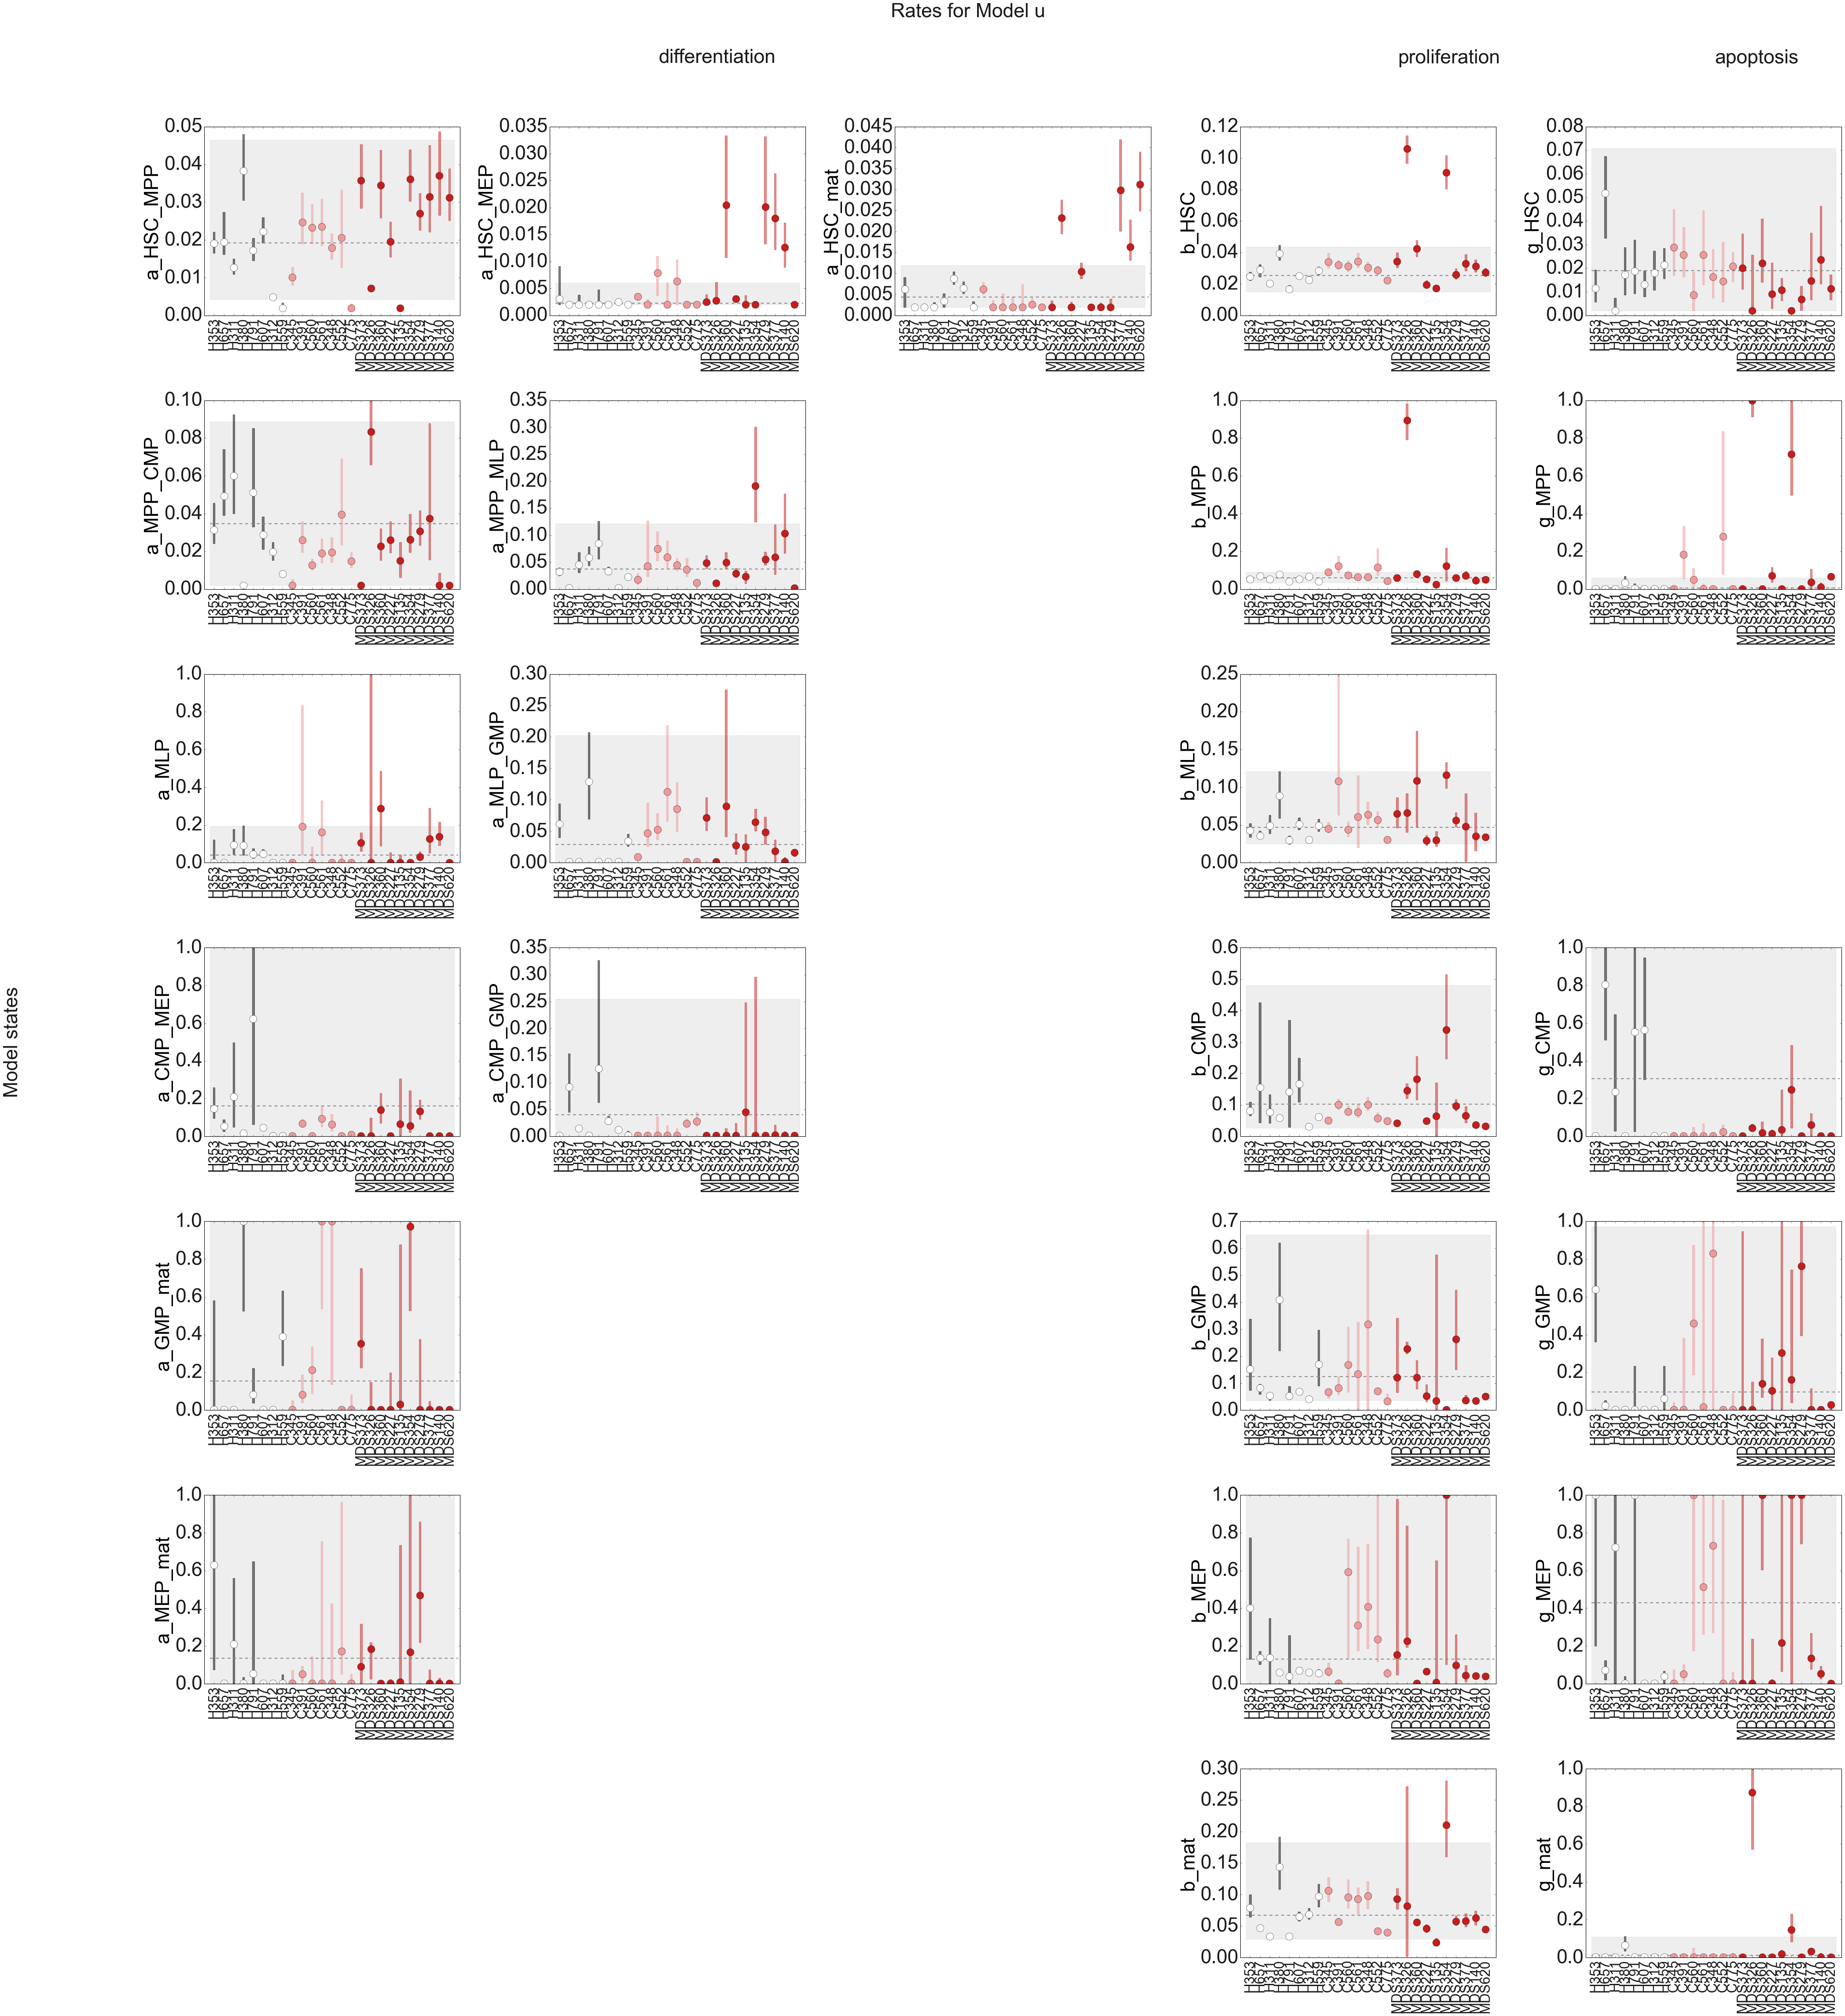

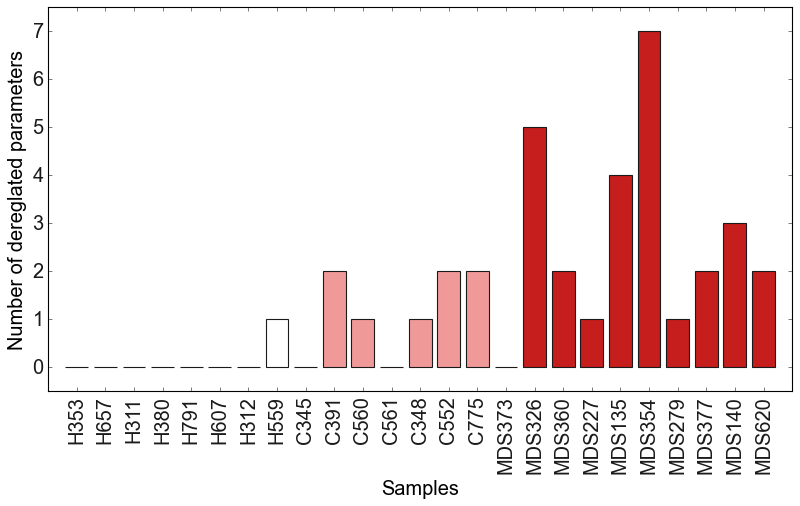

In [21]:
plt = loadPltSettings(40,10) #fonsize, markersize
par_T = 'lin'
rot_deg = 90
opt_comparison = 'H_age_matched_vs_CHIP_vs_MDS'
colors = cols_H_vs_CHIP_vs_MDS 
bool_test_par = False
#alpha_errorband = 0.01
alpha_errorband = 0.01
opt_plot_number_deregulated_rates=True
os.chdir(dir_str)
plot_par_with_CI_vs_individuals(dir_str, matlab_dir_str, folder_str_H_MDS, subfolder_str_H_MDS, subsubfolder_str_H_MDS, last_subsubfolder_str, samples_excluded_H, samples_excluded_MDS, M_names_sim, M_names_opt, CT, par_T, colors, opt_comparison, rot_deg, opt_sample_ID,bool_fit_repetitions_seperately,False,alpha_errorband,opt_plot_number_deregulated_rates,plt,opt_save)

a_HSC_MPP down-regulated in: H559,C775,MDS135
a_HSC_MEP up-regulated in: C560,C348,MDS360,MDS279,MDS377,MDS140
a_HSC_mat up-regulated in: MDS326,MDS377,MDS140,MDS620
b_HSC up-regulated in: MDS326,MDS354
a_MPP_MLP up-regulated in: MDS354
b_MPP up-regulated in: C391,C552,MDS326,MDS354
b_MPP down-regulated in: MDS135
g_MPP up-regulated in: C391,C552,MDS326,MDS227,MDS354,MDS620
a_MLP up-regulated in: C391,MDS360
b_GMP down-regulated in: C775,MDS135,MDS354,MDS140
b_MEP up-regulated in: MDS354
b_mat up-regulated in: MDS354
b_mat down-regulated in: MDS135
g_mat up-regulated in: MDS326,MDS354


C:\Users\PowerWS\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


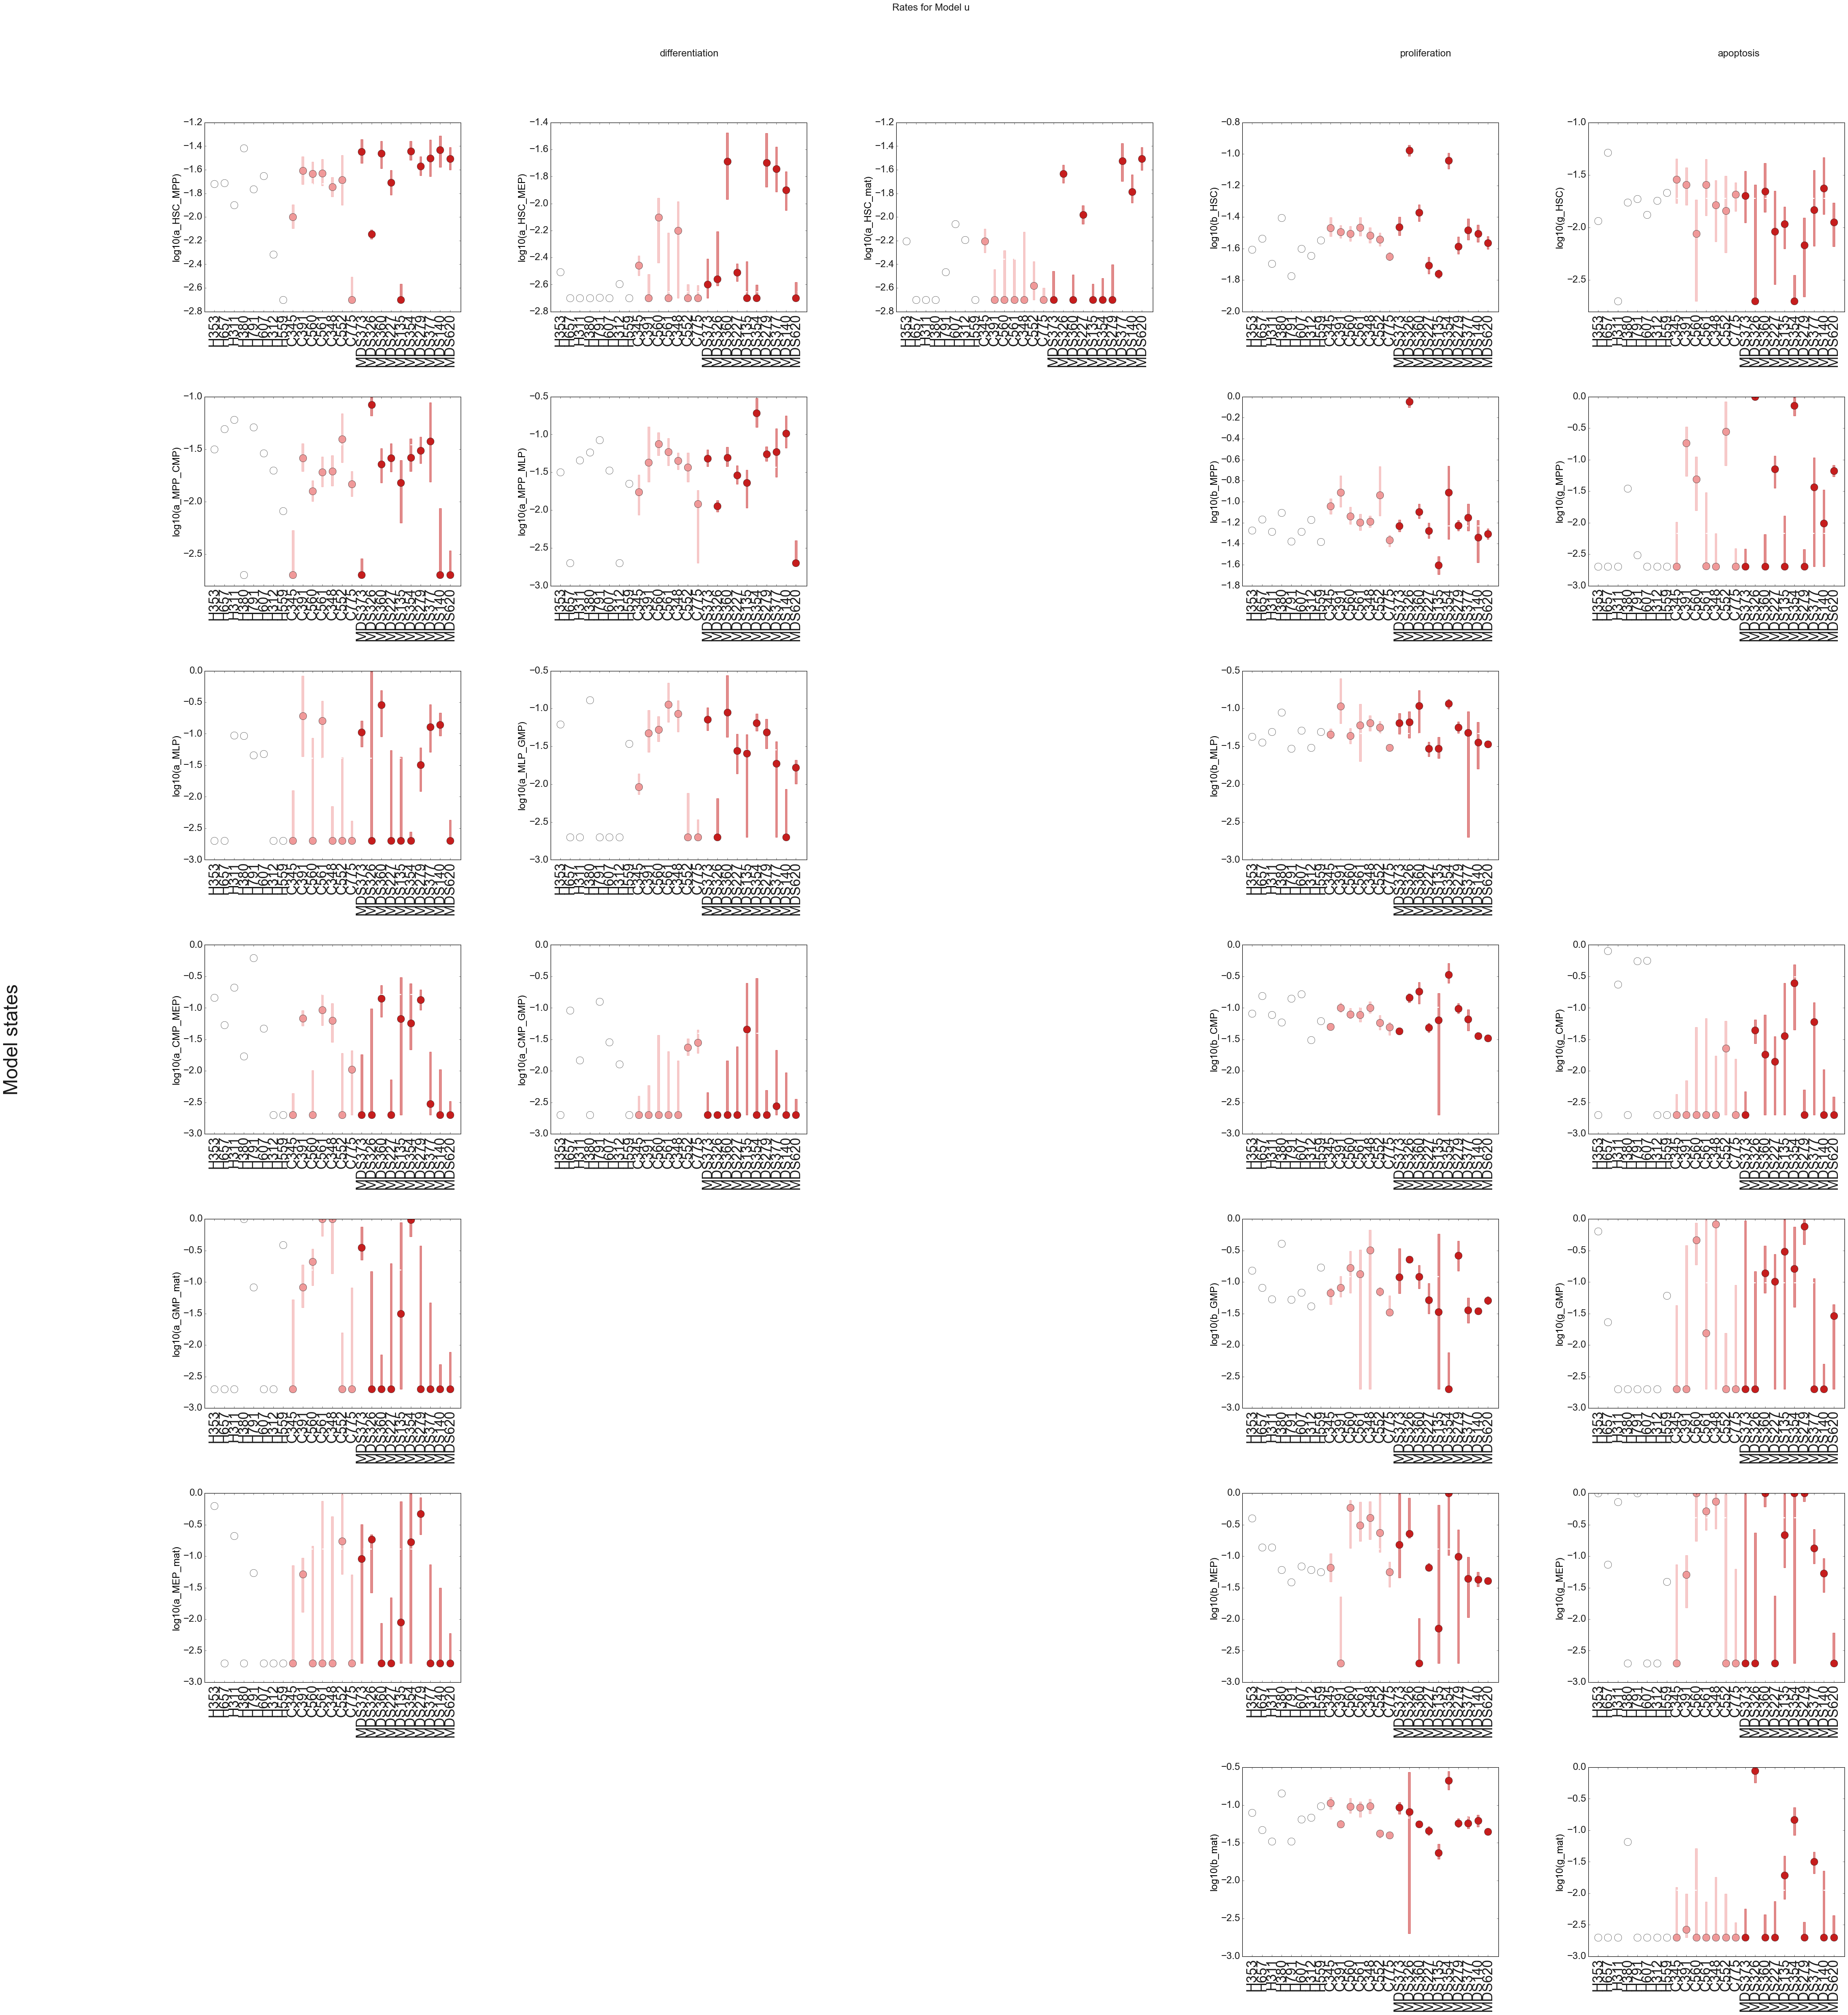

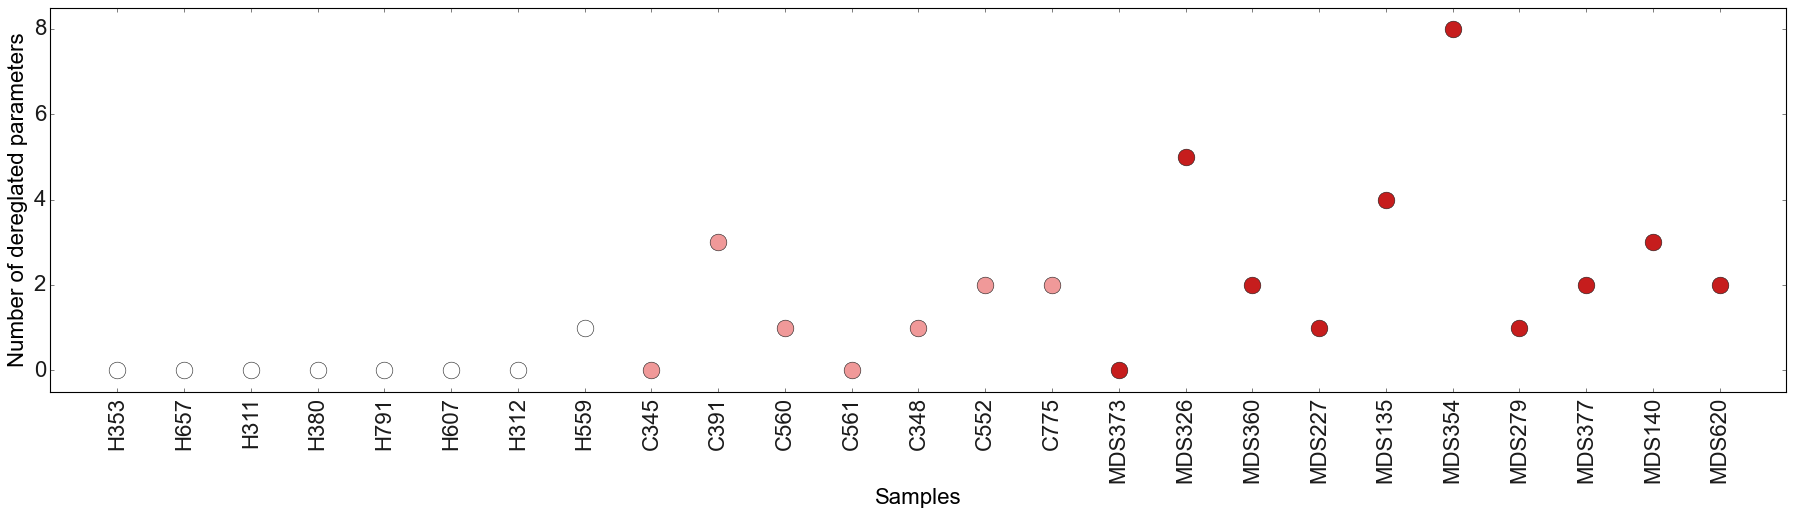

In [22]:
#par_T = 'lin'
par_T = 'log10'
rot_deg = 90
opt_comparison = 'H_age_matched_vs_CHIP_vs_MDS'
colors = cols_H_vs_CHIP_vs_MDS 
bool_test_par = False
alpha_errorband = 0.01
#alpha_errorband = 0.05
os.chdir(dir_str)
plot_par_with_CI_vs_individuals(dir_str,matlab_dir_str, folder_str_H_MDS, subfolder_str_H_MDS, subsubfolder_str_H_MDS, last_subsubfolder_str, samples_excluded_H, samples_excluded_MDS, M_names_sim, M_names_opt, CT, par_T, colors, opt_comparison, rot_deg, opt_sample_ID,bool_fit_repetitions_seperately,False,alpha_errorband,opt_plot_number_deregulated_rates,plt,opt_save)

### Map parameter estimates of all individuals to patient data

In [122]:
model_of_interest = 'model_union_ABDGI'
M_names_opt = model_of_interest#list(model_of_interest[len(model_of_interest)-1])
opt_mutations_of_interest = 'combined'
bool_identifiablePars_only=True

#### load data frames

In [25]:
mutations_of_interest_str = ''
opt_mutations_of_interest = 'combined'
df_PD, mutation_str = load_patient_data_frame(samples_excluded_H,samples_excluded_MDS,opt_mutations_of_interest,opt_sample_ID,dir_str)
#len(df_PD['Sample_ID'].unique())

In [26]:
#df_PD[['Sample_ID','Mutation_counts']]

In [27]:
df_PD.head()

Sample_ID group  year_of_birth acquisition_date_of_the_BM_sample   age sex  \
0    MDS135   MDS         1939.0                        2014-06-23  77.0   m   
1    MDS360   MDS         1963.0                        2017-03-22  54.0   m   
2    MDS227   MDS         1947.0                        2015-09-28  68.0   f   
3    MDS373   MDS         1957.0                        2017-04-26  60.0  m    
4    MDS377   MDS         1953.0                        2017-05-10  64.0   f   

       karyotype dysplasia_erythropoiesis sideroblasts  \
0     46 XY [20]                      yes         >15%   
1     46 XY [20]                      yes         >15%   
2     46 XX [20]                      yes          30%   
3     46 XY [20]                      yes          yes   
4  45 XX -7 [20]                      yes           no   

  dysplastic_granulopoiesis  ... GATA1_VAF TP53_VAF STAG2_VAF WT1_VAF  \
0                       yes  ...         0        0       NaN      51   
1                       yes  ...         0        0         0       0   
2                       yes  ...         0        0         0       0   
3                       yes  ...         0        0         0       0   
4                        no  ...         0        0       NaN       0   

  KRAS_VAF NFE2_VAF Mutation_counts Sample_ID_simplyfied number_data_points  \
0        0        0               4                  NaN                  4   
1        0        0               2                  NaN                  5   
2        0        0               2                  NaN                  7   
3        0        0               3                  NaN                  5   
4        0        0               3                  NaN                  3   

  weight_data  
0    0.016393  
1    0.020492  
2    0.028689  
3    0.020492  
4    0.012295  

[5 rows x 97 columns]

#### get parameter result per sample for particular model & merge patient data frame and parameter results data frame

In [46]:
os.chdir(dir_str)
#os.getcwd()
%run "definedFunctions.ipynb"

In [47]:
M_names_opt

'model_union_ABDGI'

In [29]:
#get parameter result data frame
par_T = 'lin' 
bool_with_weights = True
bool_identifiablePars_only = False#True#
bool_test_par=False
bool_CIs = True
bool_boundaries=False
path_matlab_result=matlab_dir_str + folder_str_H_MDS[0] + subfolder_str_H_MDS[0] 

df_PAR = get_par_estimates(path_matlab_result , last_subsubfolder_str, M_names_opt, CT, par_T, bool_identifiablePars_only,bool_with_weights,bool_test_par,bool_CIs,bool_boundaries,bool_fit_repetitions_seperately)

#merge the two data frames
if bool_fit_repetitions_seperately:
    DF = pd.merge(df_PAR,df_PD, on='Sample_ID_long', how='inner')
    opt_sample_ID = 'long'
else:
    DF = pd.merge(df_PAR,df_PD, on='Sample_ID', how='inner')
    opt_sample_ID = 'short'
ratenames = DF.columns[np.logical_and(np.logical_and(np.logical_and(np.logical_or(np.logical_or(DF.columns.str.startswith('a_'),DF.columns.str.startswith('b_')),DF.columns.str.startswith('g_')),DF.columns.str.endswith('_w_CI')==False),DF.columns.str.endswith('_CI_l')==False),DF.columns.str.endswith('CI_u')==False)]


In [127]:
df_PAR
ratenames

Index(['a_HSC_MPP', 'a_HSC_MEP', 'a_HSC_mat', 'b_HSC', 'g_HSC', 'a_MPP_CMP',
       'a_MPP_MLP', 'b_MPP', 'g_MPP', 'a_CMP_MEP', 'a_CMP_GMP', 'b_CMP',
       'g_CMP', 'a_MLP', 'a_MLP_GMP', 'b_MLP', 'a_MEP_mat', 'b_MEP', 'g_MEP',
       'a_GMP_mat', 'b_GMP', 'g_GMP', 'b_mat', 'g_mat'],
      dtype='object')

In [50]:
path_matlab_result

'D:\\Documents\\MATLAB\\HematopoieticDisorderAnalysis\\MATLAB\\parameter_inference/results_fit_samples_7divs_3iS_HO_LogNormal_fit_iC/model_union_ABDGI/'

In [51]:
DF.head(5)

Model Sample_ID_long Sample_ID  a_HSC_MPP  a_HSC_MPP_CI_l  \
0  model_union_ABDGI           H311      H311   0.012690        0.010911   
1  model_union_ABDGI           H312      H312   0.004808        0.004224   
2  model_union_ABDGI           H345      H345   0.010056        0.007997   
3  model_union_ABDGI           H348      H348   0.017895        0.014867   
4  model_union_ABDGI           H353      H353   0.019093        0.016539   

   a_HSC_MPP_CI_u  a_HSC_MPP_w_CI  a_HSC_MEP  a_HSC_MEP_CI_l  a_HSC_MEP_CI_u  \
0        0.014953        0.049214   0.002000        0.002000        0.003814   
1        0.005482        0.158080   0.002533        0.002254        0.002839   
2        0.012765        0.041729   0.003475        0.002922        0.004120   
3        0.021624        0.029438   0.006315        0.002000        0.010333   
4        0.022169        0.035332   0.003109        0.002000        0.009129   

   ...  IDH2_VAF  GATA1_VAF  TP53_VAF  STAG2_VAF  WT1_VAF  KRAS_VAF  NFE2_VAF  \
0  ...         0          0         0          0        0         0         0   
1  ...         0          0         0          0        0         0         0   
2  ...         0          0         0          0        0         0         0   
3  ...         0          0         0          0        0         0        25   
4  ...         0          0         0          0        0         0         0   

   Mutation_counts  number_data_points  weight_data  
0                0                  13     0.053279  
1                0                  18     0.073770  
2                1                   6     0.024590  
3                2                   7     0.028689  
4                0                   7     0.028689  

[5 rows x 194 columns]

### significant differences in rates between ASXL1 mutated vs non-mutated MDS patients?

In [52]:
R_ASXL1_pos = DF[np.logical_and(DF['Sample_ID_long'].str.startswith('MDS'), DF['ASXL1']!='no')]['a_HSC_MPP']
R_ASXL1_neg = DF[np.logical_and(DF['Sample_ID_long'].str.startswith('MDS'), DF['ASXL1']=='no')]['a_HSC_MPP']

In [53]:
stats.mannwhitneyu(R_ASXL1_pos, R_ASXL1_neg, alternative='greater')

MannwhitneyuResult(statistic=14.0, pvalue=0.37455956650029765)

In [54]:
#plt.plot([0,0,0,0,0,0],R_ASXL1_pos,'*r')
#plt.plot([1,1,1,1],R_ASXL1_neg,'*b')

In [55]:
ratenames

Index(['a_HSC_MPP', 'a_HSC_MEP', 'a_HSC_mat', 'b_HSC', 'g_HSC', 'a_MPP_CMP',
       'a_MPP_MLP', 'b_MPP', 'g_MPP', 'a_CMP_MEP', 'a_CMP_GMP', 'b_CMP',
       'g_CMP', 'a_MLP', 'a_MLP_GMP', 'b_MLP', 'a_MEP_mat', 'b_MEP', 'g_MEP',
       'a_GMP_mat', 'b_GMP', 'g_GMP', 'b_mat', 'g_mat'],
      dtype='object')

#### mean weighted parameter healthy age-matched in [h]

In [56]:
#calculate weights
for r_id,rate in enumerate(ratenames):
    DF[rate+'_w'] = (DF[rate+'_w_CI']+DF['weight_data'])/2

In [57]:
DF.head(5)

Model Sample_ID_long Sample_ID  a_HSC_MPP  a_HSC_MPP_CI_l  \
0  model_union_ABDGI           H311      H311   0.012690        0.010911   
1  model_union_ABDGI           H312      H312   0.004808        0.004224   
2  model_union_ABDGI           H345      H345   0.010056        0.007997   
3  model_union_ABDGI           H348      H348   0.017895        0.014867   
4  model_union_ABDGI           H353      H353   0.019093        0.016539   

   a_HSC_MPP_CI_u  a_HSC_MPP_w_CI  a_HSC_MEP  a_HSC_MEP_CI_l  a_HSC_MEP_CI_u  \
0        0.014953        0.049214   0.002000        0.002000        0.003814   
1        0.005482        0.158080   0.002533        0.002254        0.002839   
2        0.012765        0.041729   0.003475        0.002922        0.004120   
3        0.021624        0.029438   0.006315        0.002000        0.010333   
4        0.022169        0.035332   0.003109        0.002000        0.009129   

   ...  a_MLP_GMP_w   b_MLP_w  a_MEP_mat_w   b_MEP_w   g_MEP_w  a_GMP_mat_w  \
0  ...     0.061308  0.040460     0.027496  0.029973  0.027230     0.052138   
1  ...     0.111449  0.116278     0.205073  0.136758  0.243412     0.148540   
2  ...     0.028579  0.036483     0.019147  0.028444  0.020473     0.021377   
3  ...     0.015672  0.025448     0.015480  0.016435  0.015153     0.014874   
4  ...     0.016258  0.032721     0.014862  0.016137  0.015082     0.015135   

    b_GMP_w   g_GMP_w   b_mat_w   g_mat_w  
0  0.066758  0.057389  0.081083  0.062656  
1  0.160284  0.184599  0.057817  0.059726  
2  0.043250  0.027244  0.021664  0.020992  
3  0.016016  0.014958  0.022732  0.020006  
4  0.018570  0.015305  0.024519  0.021617  

[5 rows x 218 columns]

In [58]:
#get dataframes sorted by group comparison H age matched vs. MDS
DF, DF_H, DF_CHIP, DF_MDS, lab_str1, lab_str2, lab_str3 = get_dataframe_selection(DF,'H_age_matched_vs_CHIP_vs_MDS',opt_sample_ID)

In [59]:
DF_CHIP

Model Sample_ID_long Sample_ID  a_HSC_MPP  a_HSC_MPP_CI_l  \
0  model_union_ABDGI           H345      H345   0.010056        0.007997   
1  model_union_ABDGI           H348      H348   0.017895        0.014867   
2  model_union_ABDGI           H391      H391   0.024627        0.018963   
3  model_union_ABDGI           H552      H552   0.020566        0.012638   
4  model_union_ABDGI           H560      H560   0.023311        0.019009   
5  model_union_ABDGI           H561      H561   0.023551        0.018450   
6  model_union_ABDGI           H775      H775   0.002000        0.002000   

   a_HSC_MPP_CI_u  a_HSC_MPP_w_CI  a_HSC_MEP  a_HSC_MEP_CI_l  a_HSC_MEP_CI_u  \
0        0.012765        0.041729   0.003475        0.002922        0.004120   
1        0.021624        0.029438   0.006315        0.002000        0.010333   
2        0.032443        0.014758   0.002000        0.002000        0.003006   
3        0.033312        0.009623   0.002000        0.002000        0.002514   
4        0.029400        0.019145   0.007874        0.003642        0.010962   
5        0.030832        0.016066   0.002000        0.002000        0.006092   
6        0.003122        0.177331   0.002000        0.002000        0.002481   

   ...  a_MLP_GMP_w   b_MLP_w  a_MEP_mat_w   b_MEP_w   g_MEP_w  a_GMP_mat_w  \
0  ...     0.028579  0.036483     0.019147  0.028444  0.020473     0.021377   
1  ...     0.015672  0.025448     0.015480  0.016435  0.015153     0.014874   
2  ...     0.017898  0.018209     0.022291  0.072093  0.023137     0.019499   
3  ...     0.026701  0.024525     0.008721  0.009501  0.008803     0.041592   
4  ...     0.016824  0.031037     0.017715  0.016164  0.015058     0.016178   
5  ...     0.015023  0.017884     0.014979  0.016439  0.015141     0.015329   
6  ...     0.095482  0.080413     0.032262  0.046131  0.032313     0.028307   

    b_GMP_w   g_GMP_w   b_mat_w   g_mat_w  
0  0.043250  0.027244  0.021664  0.020992  
1  0.016016  0.014958  0.022732  0.020006  
2  0.033364  0.018004  0.045092  0.028000  
3  0.057098  0.053226  0.043789  0.019906  
4  0.018951  0.015234  0.022291  0.016174  
5  0.017786  0.014958  0.022984  0.031318  
6  0.057873  0.029556  0.072326  0.086441  

[7 rows x 218 columns]

In [60]:
DF_MDS

Model Sample_ID_long Sample_ID  a_HSC_MPP  a_HSC_MPP_CI_l  \
0  model_union_ABDGI         MDS227    MDS227   0.019538        0.015432   
1  model_union_ABDGI         MDS373    MDS373   0.035780        0.028457   
2  model_union_ABDGI         MDS326    MDS326   0.007171        0.006524   
3  model_union_ABDGI         MDS360    MDS360   0.034446        0.025864   
4  model_union_ABDGI         MDS135    MDS135   0.002000        0.002000   
5  model_union_ABDGI         MDS354    MDS354   0.036076        0.030329   
6  model_union_ABDGI         MDS140    MDS140   0.037020        0.026566   
7  model_union_ABDGI         MDS279    MDS279   0.026976        0.022527   
8  model_union_ABDGI         MDS377    MDS377   0.031420        0.022153   
9  model_union_ABDGI         MDS620    MDS620   0.031259        0.025089   

   a_HSC_MPP_CI_u  a_HSC_MPP_w_CI  a_HSC_MEP  a_HSC_MEP_CI_l  a_HSC_MEP_CI_u  \
0        0.024848        0.039083   0.003095        0.002664        0.003579   
1        0.045372        0.021755   0.002521        0.002000        0.003909   
2        0.007818        0.284436   0.002759        0.002466        0.006200   
3        0.043825        0.020487   0.020477        0.010734        0.033348   
4        0.002721        0.510515   0.002000        0.002000        0.003721   
5        0.043960        0.026996   0.002000        0.002000        0.002494   
6        0.048691        0.016632   0.012623        0.008935        0.017219   
7        0.032380        0.037350   0.020093        0.013306        0.033174   
8        0.045077        0.016052   0.017997        0.012232        0.026315   
9        0.038874        0.026694   0.002000        0.002000        0.002614   

   ...  a_MLP_GMP_w   b_MLP_w  a_MEP_mat_w   b_MEP_w   g_MEP_w  a_GMP_mat_w  \
0  ...     0.039035  0.096916     0.062913  0.078462  0.086005     0.017712   
1  ...     0.025425  0.036848     0.013360  0.011550  0.011790     0.011495   
2  ...     0.191617  0.033237     0.017384  0.014187  0.018860     0.016806   
3  ...     0.013665  0.018659     0.158381  0.156878  0.014144     0.141851   
4  ...     0.026665  0.062583     0.009535  0.010067  0.009845     0.008951   
5  ...     0.037251  0.044952     0.015326  0.015702  0.015888     0.015739   
6  ...     0.129292  0.029619     0.041616  0.061643  0.031761     0.233064   
7  ...     0.032734  0.070232     0.015881  0.019027  0.020320     0.016109   
8  ...     0.029183  0.018027     0.019706  0.020205  0.014150     0.020803   
9  ...     0.102182  0.215976     0.272948  0.239328  0.404288     0.144519   

    b_GMP_w   g_GMP_w   b_mat_w   g_mat_w  
0  0.030338  0.019044  0.084521  0.059783  
1  0.013987  0.011612  0.036649  0.077397  
2  0.035025  0.021117  0.015528  0.012872  
3  0.020002  0.014399  0.090497  0.103885  
4  0.009984  0.009491  0.086973  0.016100  
5  0.196866  0.016176  0.021565  0.016012  
6  0.168525  0.441447  0.047214  0.020099  
7  0.017837  0.016480  0.072418  0.176883  
8  0.036943  0.017737  0.047565  0.016255  
9  0.097542  0.059546  0.124119  0.127763  

[10 rows x 218 columns]

In [61]:
DF_H

Model Sample_ID_long Sample_ID  a_HSC_MPP  a_HSC_MPP_CI_l  \
0  model_union_ABDGI           H311      H311   0.012690        0.010911   
1  model_union_ABDGI           H312      H312   0.004808        0.004224   
2  model_union_ABDGI           H353      H353   0.019093        0.016539   
3  model_union_ABDGI           H380      H380   0.038273        0.030534   
4  model_union_ABDGI           H559      H559   0.002000        0.002000   
5  model_union_ABDGI           H607      H607   0.022251        0.019185   
6  model_union_ABDGI           H657      H657   0.019472        0.016215   
7  model_union_ABDGI           H791      H791   0.017218        0.014510   

   a_HSC_MPP_CI_u  a_HSC_MPP_w_CI  a_HSC_MEP  a_HSC_MEP_CI_l  a_HSC_MEP_CI_u  \
0        0.014953        0.049214   0.002000        0.002000        0.003814   
1        0.005482        0.158080   0.002533        0.002254        0.002839   
2        0.022169        0.035332   0.003109        0.002000        0.009129   
3        0.047970        0.011410   0.002000        0.002000        0.002276   
4        0.003389        0.143262   0.002000        0.002000        0.002378   
5        0.025932        0.029484   0.002000        0.002000        0.002221   
6        0.027406        0.017776   0.002000        0.002000        0.002421   
7        0.020501        0.033207   0.002003        0.002000        0.004826   

   ...  a_MLP_GMP_w   b_MLP_w  a_MEP_mat_w   b_MEP_w   g_MEP_w  a_GMP_mat_w  \
0  ...     0.061308  0.040460     0.027496  0.029973  0.027230     0.052138   
1  ...     0.111449  0.116278     0.205073  0.136758  0.243412     0.148540   
2  ...     0.016258  0.032721     0.014862  0.016137  0.015082     0.015135   
3  ...     0.010998  0.015700     0.024463  0.058805  0.026095     0.011210   
4  ...     0.019621  0.035337     0.024467  0.051053  0.023397     0.015503   
5  ...     0.103292  0.048113     0.168447  0.103840  0.200219     0.095738   
6  ...     0.071926  0.058307     0.075670  0.038922  0.028354     0.119495   
7  ...     0.064315  0.045531     0.015085  0.018869  0.014935     0.016828   

    b_GMP_w   g_GMP_w   b_mat_w   g_mat_w  
0  0.066758  0.057389  0.081083  0.062656  
1  0.160284  0.184599  0.057817  0.059726  
2  0.018570  0.015305  0.024519  0.021617  
3  0.013031  0.133477  0.014605  0.011413  
4  0.019715  0.016983  0.024483  0.023309  
5  0.089971  0.118183  0.050891  0.067270  
6  0.052395  0.035068  0.070414  0.064883  
7  0.036749  0.016996  0.054819  0.023026  

[8 rows x 218 columns]

In [62]:
#weighted mean and std of weighted mean group healthy age matched:
par_mean_w_H = [0]*len(ratenames)
par_std_w_H = [0]*len(ratenames)
for r_id,rate in enumerate(ratenames):
    weighted_stats_H = DescrStatsW(DF_H[rate], weights=DF_H[rate+'_w'], ddof=0)
    par_mean_w_H[r_id] = weighted_stats_H.mean
    par_std_w_H[r_id] = weighted_stats_H.std    

In [63]:
DF_weighted_mean_and_std_H = pd.DataFrame({'rate':ratenames,'weighted mean healthy age-matched':par_mean_w_H,'std of weighted mean healthy age-matched':par_std_w_H})
DF_weighted_mean_and_std_H

rate  weighted mean healthy age-matched  \
0   a_HSC_MPP                           0.011527   
1   a_HSC_MEP                           0.002123   
2   a_HSC_mat                           0.003747   
3       b_HSC                           0.024299   
4       g_HSC                           0.016950   
5   a_MPP_CMP                           0.017295   
6   a_MPP_MLP                           0.015145   
7       b_MPP                           0.055233   
8       g_MPP                           0.002818   
9   a_CMP_MEP                           0.072549   
10  a_CMP_GMP                           0.023168   
11      b_CMP                           0.076225   
12      g_CMP                           0.177757   
13      a_MLP                           0.024653   
14  a_MLP_GMP                           0.008537   
15      b_MLP                           0.040612   
16  a_MEP_mat                           0.030495   
17      b_MEP                           0.084987   
18      g_MEP                           0.092692   
19  a_GMP_mat                           0.041080   
20      b_GMP                           0.074571   
21      g_GMP                           0.021871   
22      b_mat                           0.056755   
23      g_mat                           0.004181   

    std of weighted mean healthy age-matched  
0                                   0.009177  
1                                   0.000274  
2                                   0.002466  
3                                   0.005268  
4                                   0.013390  
5                                   0.019184  
6                                   0.020925  
7                                   0.011001  
8                                   0.005010  
9                                   0.140774  
10                                  0.033758  
11                                  0.045816  
12                                  0.276146  
13                                  0.034380  
14                                  0.022665  
15                                  0.013024  
16                                  0.109234  
17                                  0.066838  
18                                  0.261174  
19                                  0.164702  
20                                  0.065879  
21                                  0.102321  
22                                  0.025963  
23                                  0.011592

#### HSC cell cycle length for MDS326 and MDS354

In [64]:
p_id = ['MDS326','MDS354']
for i in range(0,2):
    print('cell cyle length '+p_id[i]+':'+str(1/DF[DF['Sample_ID']==p_id[i]]['b_HSC'].to_numpy())+' and 95% confidence interval: '+ str(1/DF[DF['Sample_ID']==p_id[i]]['b_HSC_CI_u'].to_numpy()) + ',' + str(1/DF[DF['Sample_ID']==p_id[i]]['b_HSC_CI_l'].to_numpy()))

cell cyle length MDS326:[9.4503] and 95% confidence interval: [8.751],[10.3395]
cell cyle length MDS354:[10.9983] and 95% confidence interval: [9.8335],[12.4342]


### Age vs parameter estimates

In [65]:
os.chdir(dir_str)
#os.getcwd()
%run "definedFunctions.ipynb"

In [66]:
par_T = 'lin' 
bool_CIs = True
bool_with_weights = False
bool_identifiablePars_only = True#False#
bool_test_par=False
df_PAR = get_par_estimates(path_matlab_result, last_subsubfolder_str, M_names_opt, CT, par_T, bool_identifiablePars_only,bool_with_weights,bool_test_par,bool_CIs,bool_boundaries,bool_fit_repetitions_seperately)

C:\Users\PowerWS\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [67]:
#merge data frames
if bool_fit_repetitions_seperately:
    DF = pd.merge(df_PAR,df_PD, on='Sample_ID_long', how='inner')
else:
    DF = pd.merge(df_PAR,df_PD, on='Sample_ID', how='inner')
ratenames = DF.columns[np.logical_and(np.logical_or(np.logical_or(DF.columns.str.startswith('a_'),DF.columns.str.startswith('b_')),DF.columns.str.startswith('g_')),DF.columns.str.endswith('_w')==False)]

In [68]:
bool_per_day = True
bool_plot_IDs = False
ratenames = DF.columns[np.logical_and(np.logical_and(np.logical_and(np.logical_or(np.logical_or(DF.columns.str.startswith('a_'),DF.columns.str.startswith('b_')),DF.columns.str.startswith('g_')),DF.columns.str.endswith('_w_CI')==False),DF.columns.str.endswith('_CI_l')==False),DF.columns.str.endswith('CI_u')==False)]
if bool_per_day and par_T=='ratio':
    DF_day = DF.copy()
    DF_day[ratenames] = DF[ratenames]

In [69]:
#1/DF[DF['age']==79]['b_HSC']
#bool_identifiablePars_only
plt = loadPltSettings(30,40)

In [70]:
os.chdir(dir_str)
#os.getcwd()
%run "definedFunctions.ipynb"

In [71]:
#DF[['age','a_HSC_MPP_CI_u']]

In [72]:
ratenames

Index(['a_HSC_MPP', 'a_HSC_MEP', 'a_HSC_mat', 'b_HSC', 'g_HSC', 'a_MPP_CMP',
       'a_MPP_MLP', 'b_MPP', 'g_MPP', 'a_CMP_MEP', 'a_CMP_GMP', 'b_CMP',
       'g_CMP', 'a_MLP', 'a_MLP_GMP', 'b_MLP', 'a_MEP_mat', 'b_MEP', 'g_MEP',
       'a_GMP_mat', 'b_GMP', 'g_GMP', 'b_mat', 'g_mat'],
      dtype='object')

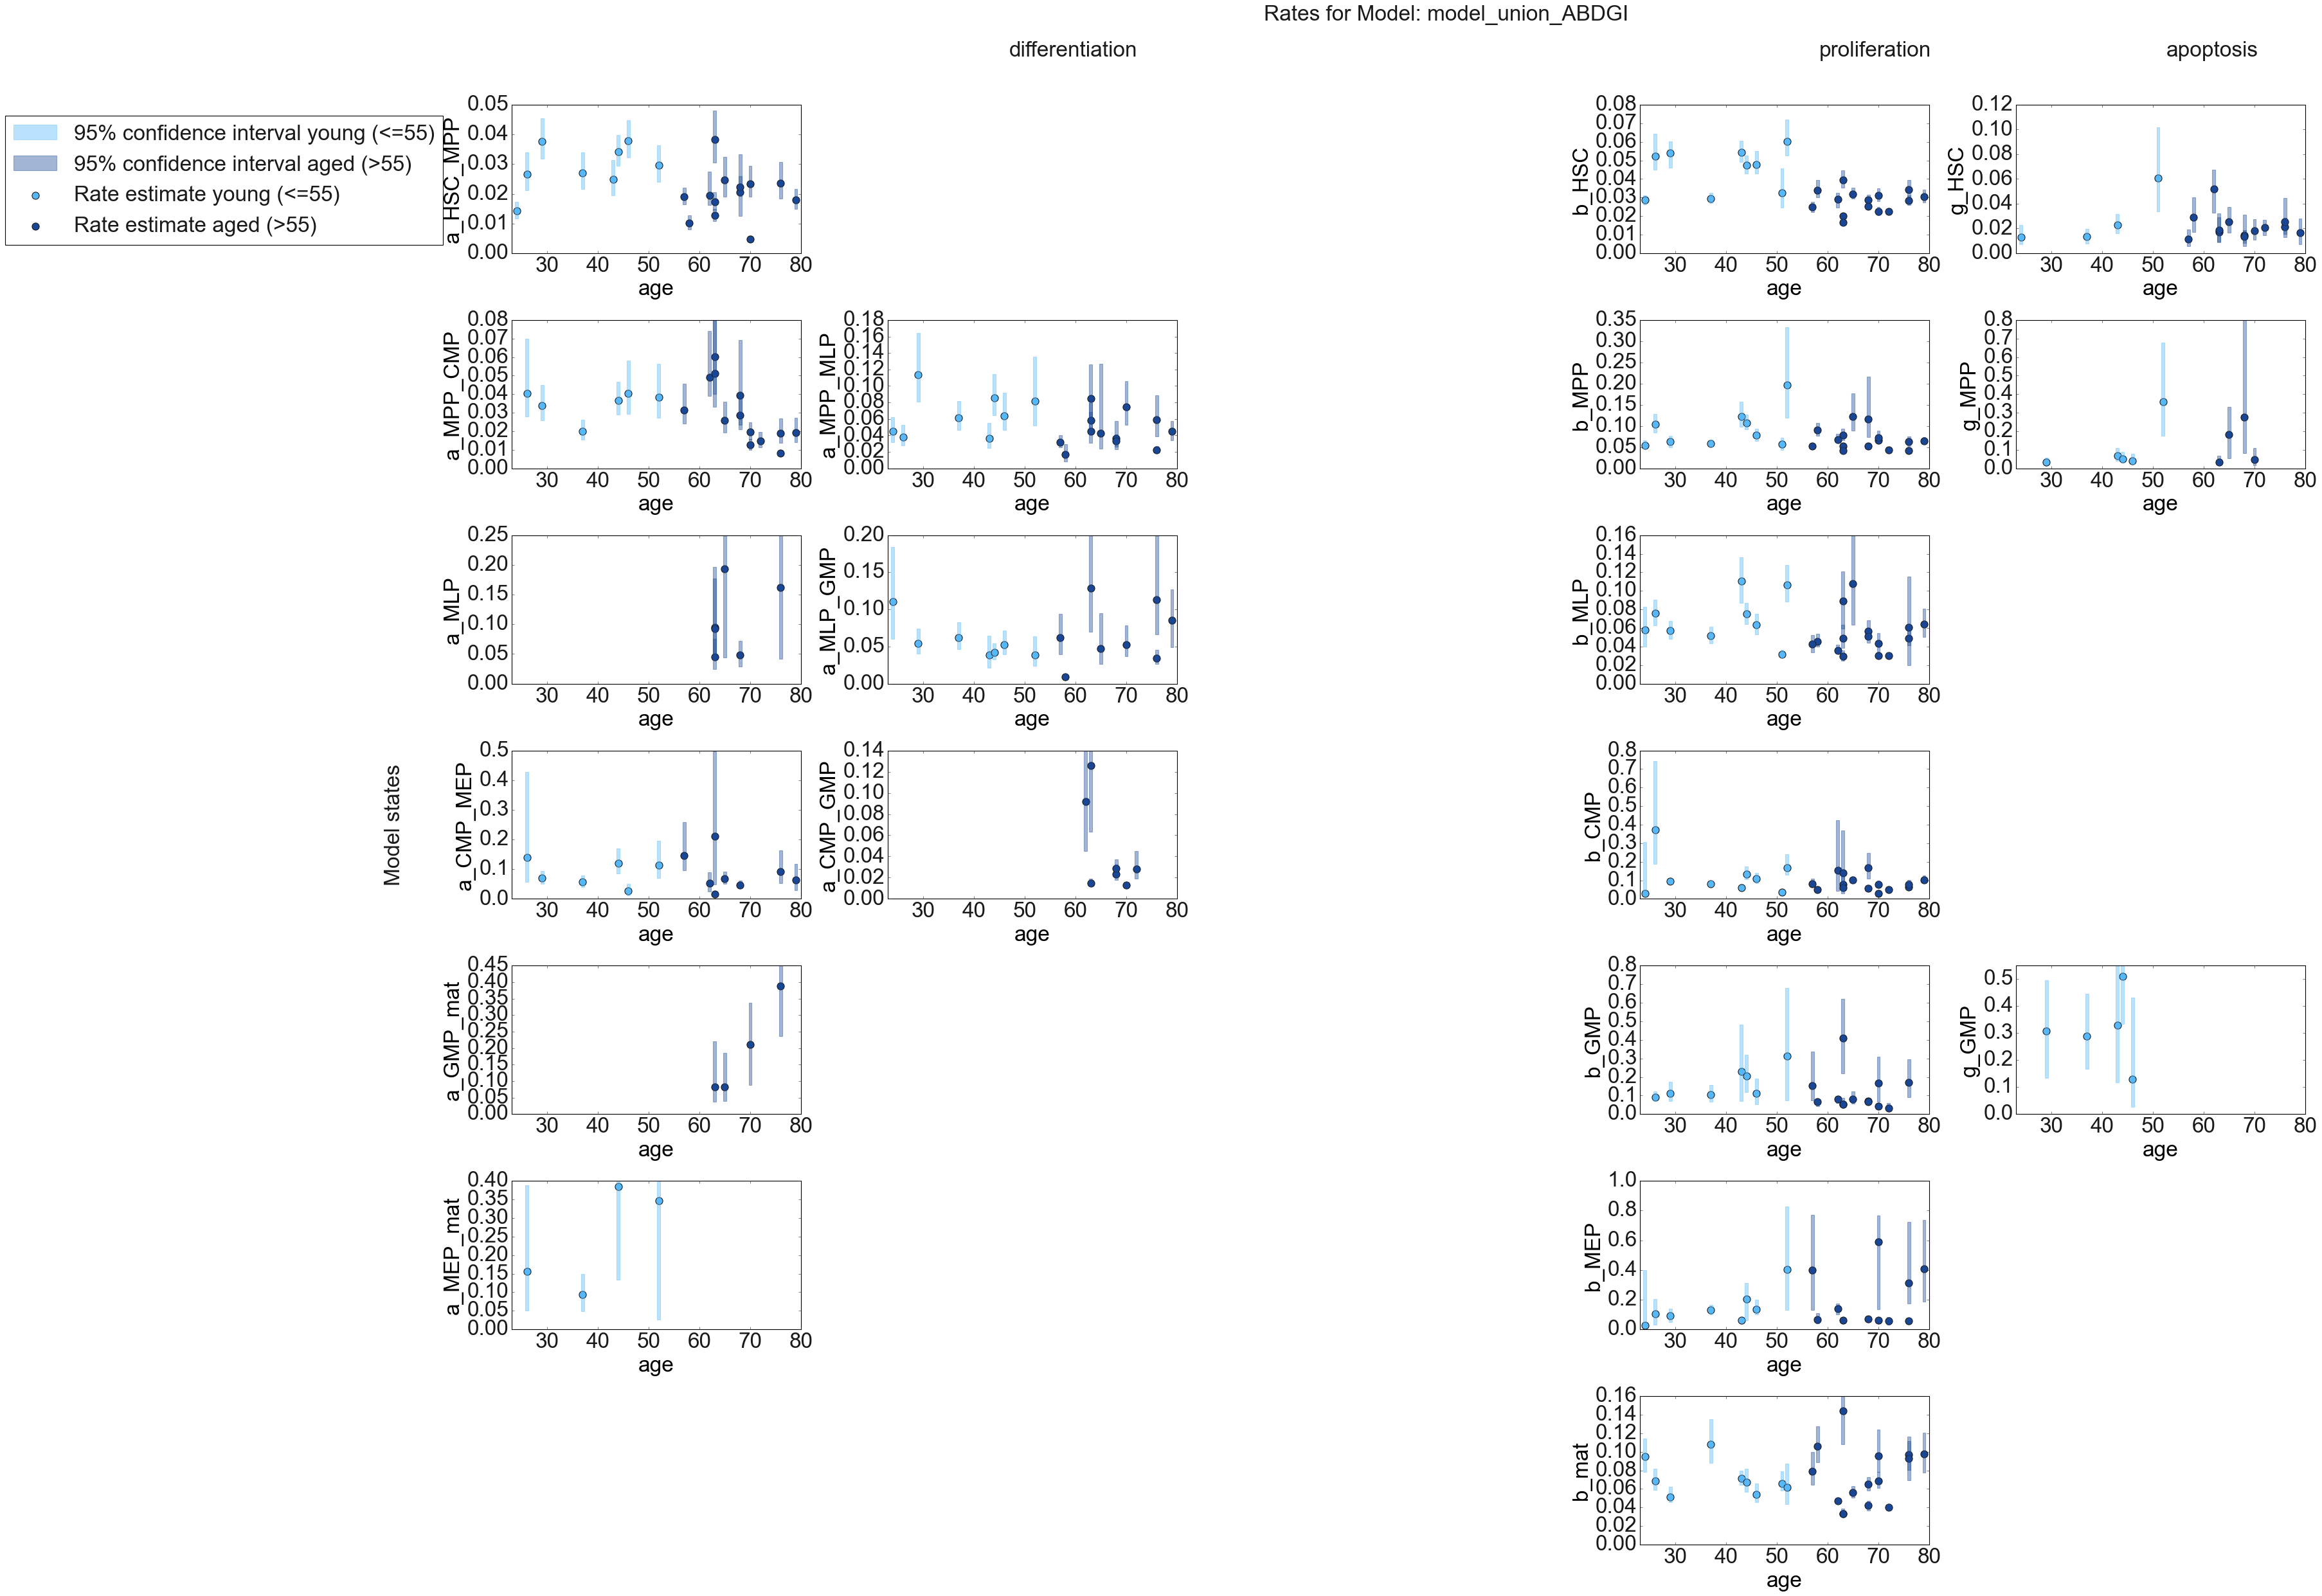

In [73]:
opt_comparison = 'H_young_vs_H_aged_with_CHIP'
opt_plot_CIs = True
opt_regression_Line= False
opt_single_regressionLine = True
opt_log_transform_rates = False #True # if set to True individual rates are first transformed such that normal assumption holds
model_of_interest = 'model_union_ABDGI'
plot_par_vs_age(DF,matlab_dir_str, par_T, folder_str_H_MDS, subfolder_str_H_MDS, model_of_interest, CT, ratenames,cols_H_y_vs_H_a ,opt_comparison,opt_regression_Line,opt_single_regressionLine,bool_plot_IDs,opt_sample_ID,opt_log_transform_rates,opt_plot_CIs,opt_save)

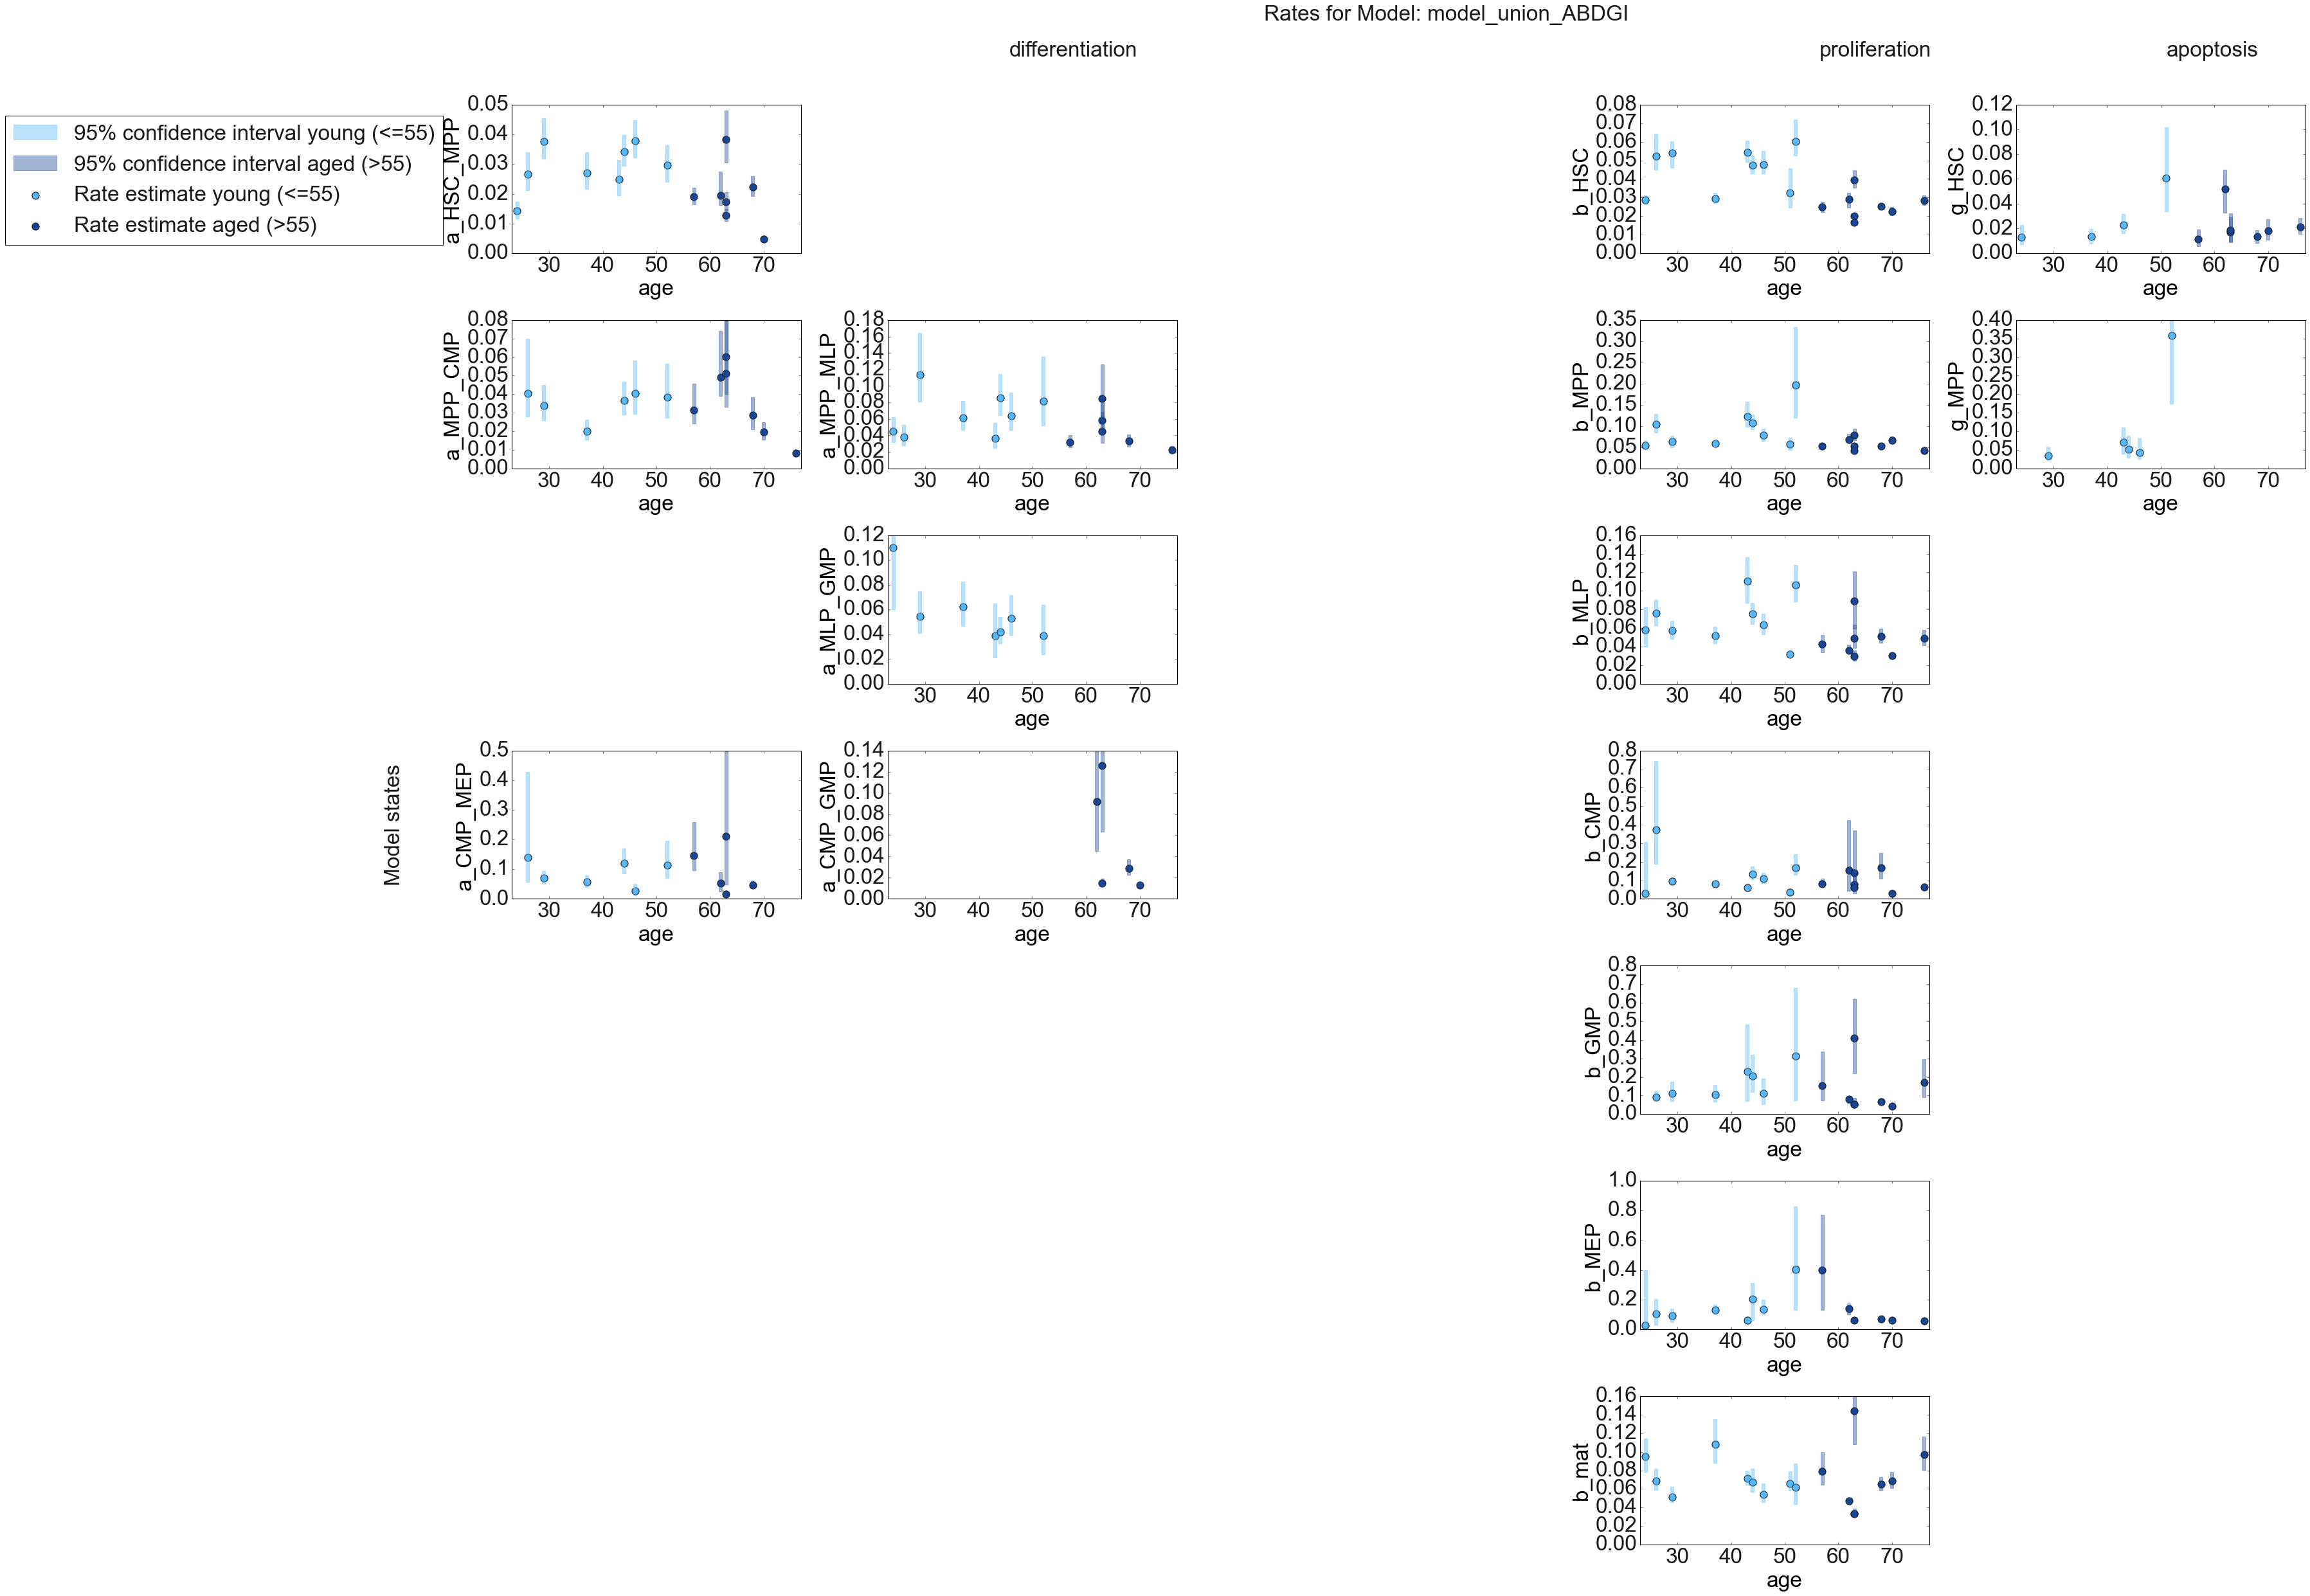

In [74]:
opt_comparison = 'H_young_vs_H_aged_without_CHIP'
opt_single_regressionLine = True
opt_log_transform_rates = False #True # if set to True individual rates are first transformed such that normal assumption holds
plot_par_vs_age(DF,matlab_dir_str, par_T, folder_str_H_MDS, subfolder_str_H_MDS, model_of_interest, CT, ratenames,cols_H_y_vs_H_a ,opt_comparison,opt_regression_Line,opt_single_regressionLine,bool_plot_IDs,opt_sample_ID,opt_log_transform_rates,opt_plot_CIs,opt_save)

In [75]:
#j=list(range(1,22))
#t = [1/i for i in j]
#alpha=0.05
#TH = [alpha* k/(np.sum(t)*21) for k in j]
#TH

### Metrics plots

In [76]:
bool_identifiablePars_only=True#False#
bool_with_weights=False
bool_test_par=False
bool_CIs=False
bool_boundaries=False
par_T = 'lin'
path_matlab_result=matlab_dir_str + folder_str_H_MDS[0] + subfolder_str_H_MDS[0] 
df_PAR = get_par_estimates(path_matlab_result, last_subsubfolder_str, M_names_opt, CT, par_T, bool_identifiablePars_only,bool_with_weights,bool_test_par,bool_CIs,bool_boundaries,bool_fit_repetitions_seperately)

C:\Users\PowerWS\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [77]:
if opt_sample_ID=='long':
    I_col = 'Sample_ID_long'
elif opt_sample_ID=='short':
    I_col = 'Sample_ID'
    
DF = pd.merge(df_PAR,df_PD, on=I_col, how='inner')

#add metrics as columns to dataframe
DF = addMetrics2dataframe(DF,par_T,CT)

In [78]:
#DF.to_excel("parameter_results_and_metrics.xlsx") 

In [79]:
#DF['HSC_accumulation_time']

In [80]:
#DF.columns[DF.columns.str.endswith('ration')]

In [81]:
#DF[(DF['Sample_ID'].str.startswith('H')) & (DF['MEP_cellular_exit_time'].get_values()<8)][['Sample_ID','MEP_cellular_exit_time','age']]

In [82]:
#DF[(DF['Sample_ID'].str.startswith('H')) & (DF['MEP_cellular_exit_time'].get_values()>=8)][['Sample_ID','MEP_cellular_exit_time','age']]

In [83]:
#comp = 'HSC'
#DF[DF['Sample_ID'].str.startswith('H')][comp+'_cellular_exit_time'].mean()

In [84]:
#DF[['Sample_ID','CMP_net_proliferation','age']]

In [85]:
#DF[['HSC_net_proliferation','Sample_ID']][DF['Sample_ID'].str.startswith('MDS')]

In [86]:
#DF['MEP_net_proliferation'][DF['Sample_ID']=='MDS326']

In [87]:
os.chdir(dir_str)
#os.getcwd()
%run "definedFunctions.ipynb"

In [88]:
opt_sample_ID

'short'

In [89]:
par_T

'lin'

In [90]:
plt = loadPltSettings(20,50)

Kruskal Wallis test:
p-value overall differences between groups: 0.047836516558927095


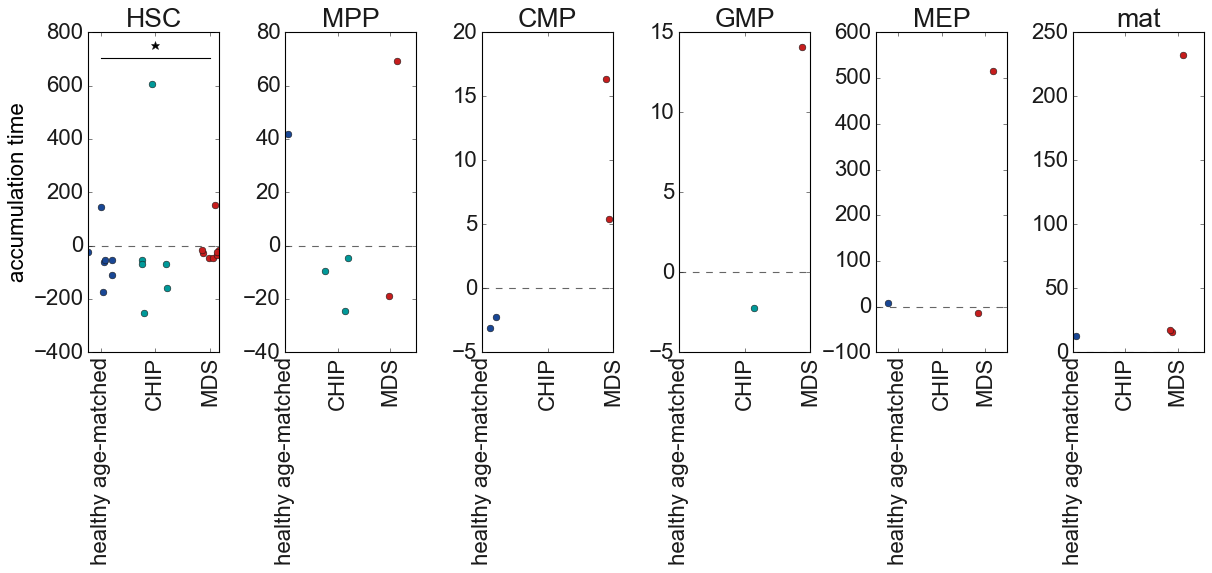

In [91]:
bool_interrupt_axis=False#True#
metric_str = '_accumulation_time'
CT_list = ['HSC','MPP','CMP','GMP','MEP','mat']
MS=6
plot_metricComparison(path_matlab_result,DF,par_T,metric_str,CT_list,bool_interrupt_axis,MS,'H_age_matched_vs_CHIP_vs_MDS',opt_sample_ID,opt_save)

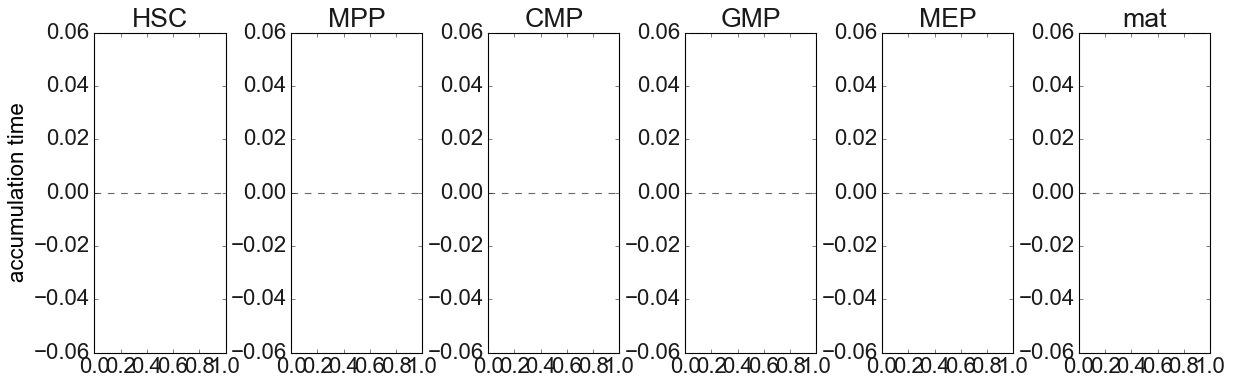

In [92]:
bool_interrupt_axis=False#True#
metric_str = '_accumulation_time'
CT_list = ['HSC','MPP','CMP','GMP','MEP','mat']
MS=6
plot_metricComparison(path_matlab_result,DF,par_T,metric_str,CT_list,bool_interrupt_axis,MS,'H_young_vs_H_aged',opt_sample_ID,opt_save)

In [93]:
plt = loadPltSettings(15,40)

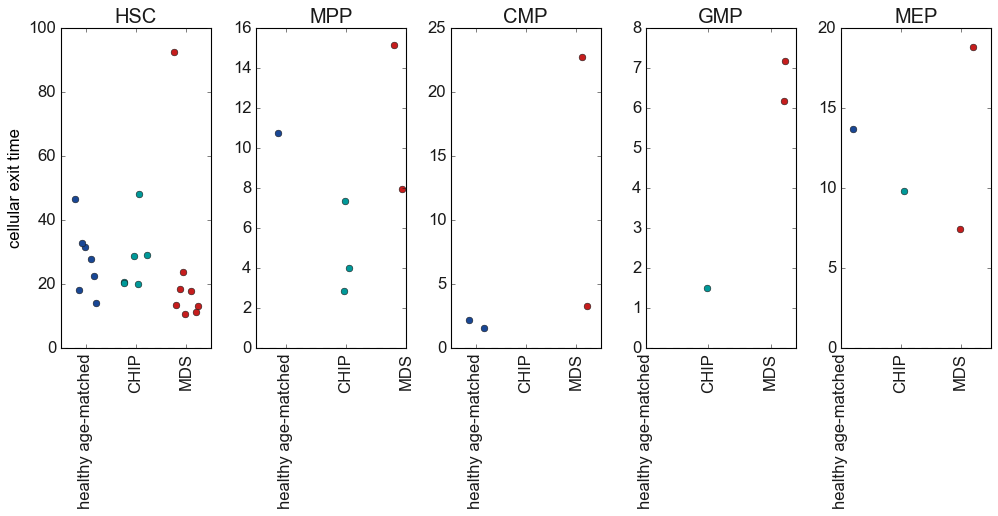

In [94]:
metric_str = '_cellular_exit_time'
bool_interrupt_axis=False#True#
CT_list = ['HSC','MPP','CMP','GMP','MEP']
MS=6
plot_metricComparison(path_matlab_result,DF,par_T,metric_str,CT_list,bool_interrupt_axis,MS,'H_age_matched_vs_CHIP_vs_MDS',opt_sample_ID,opt_save)

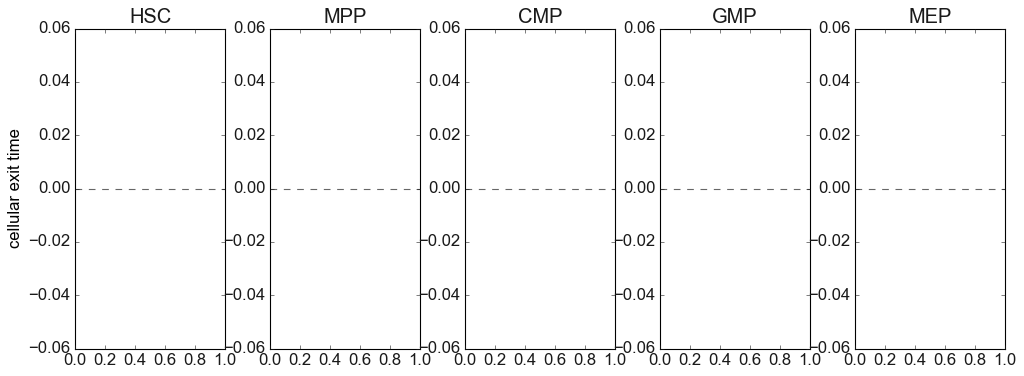

In [95]:
metric_str = '_cellular_exit_time'
bool_interrupt_axis=False#True#
CT_list = ['HSC','MPP','CMP','GMP','MEP']
MS=6
plot_metricComparison(path_matlab_result,DF,par_T,metric_str,CT_list,bool_interrupt_axis,MS,'H_young_vs_H_aged',opt_sample_ID,opt_save)

In [96]:
DF['HSC_net_proliferation'][DF['Sample_ID_long'].str.startswith('MDS')]

24    0.010482
25    0.014211
26         NaN
27    0.020268
28    0.006493
29         NaN
30    0.007612
31    0.019026
32    0.018270
33    0.016067
Name: HSC_net_proliferation, dtype: float64

In [97]:
DF['HSC_cellular_exit_time'][DF['Sample_ID']=='MDS354']

29   NaN
Name: HSC_cellular_exit_time, dtype: float64

In [98]:
DF['HSC_cellular_exit_time'][DF['Sample_ID']=='MDS326']

26   NaN
Name: HSC_cellular_exit_time, dtype: float64

In [99]:
DF['HSC_cellular_exit_time'][DF['Sample_ID']=='H312']

1    31.498435
Name: HSC_cellular_exit_time, dtype: float64

In [100]:
DF['HSC_cellular_exit_time'][DF['Sample_ID']=='H391']

7    19.90971
Name: HSC_cellular_exit_time, dtype: float64

In [101]:
plt = loadPltSettings(20,80)

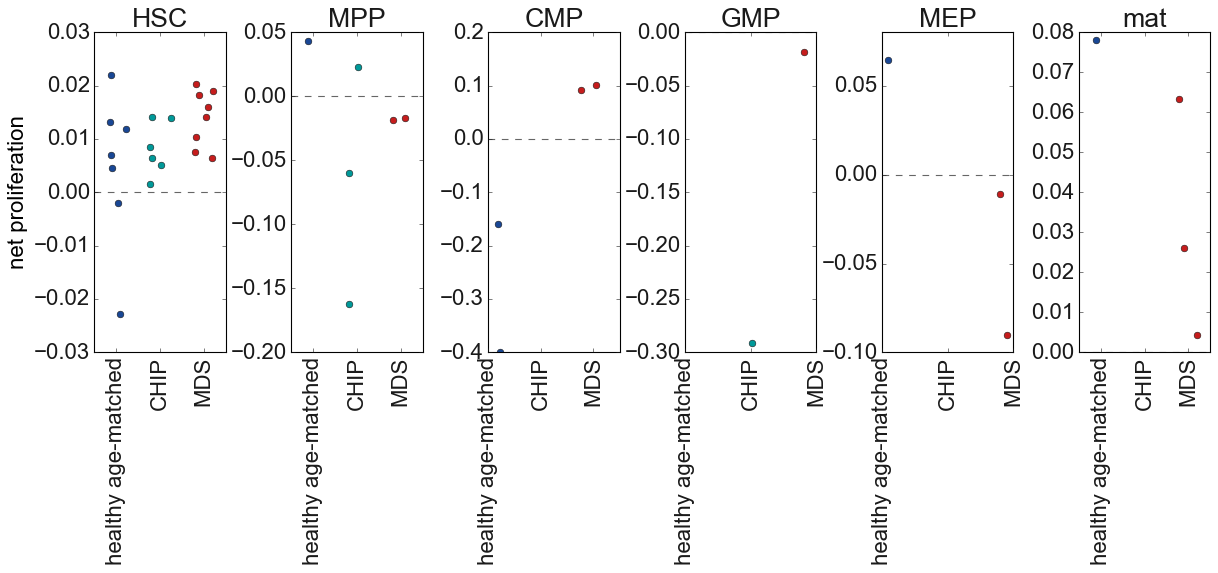

In [102]:
bool_interrupt_axis=False#True#
metric_str = '_net_proliferation'
CT_list = ['HSC','MPP','CMP','GMP','MEP','mat']
MS=6
plot_metricComparison(path_matlab_result,DF,par_T,metric_str,CT_list,bool_interrupt_axis,MS,'H_age_matched_vs_CHIP_vs_MDS',opt_sample_ID,opt_save)

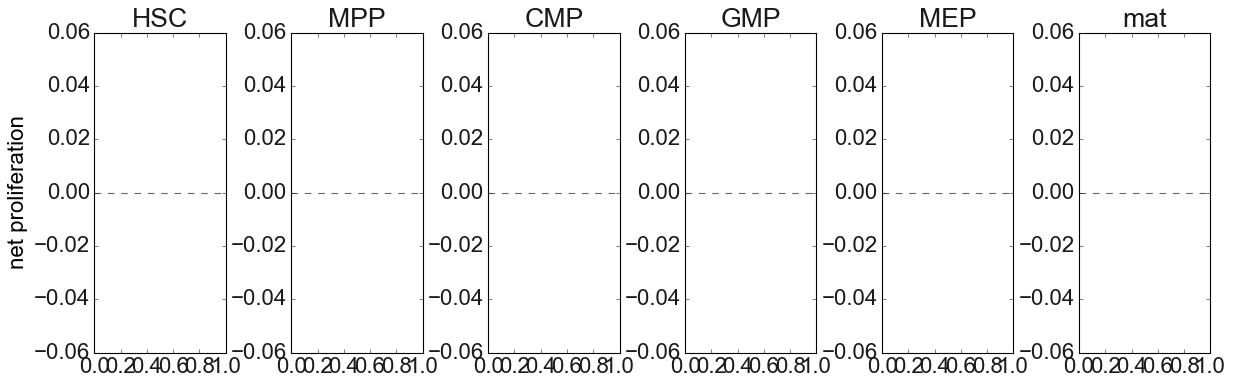

In [103]:
plot_metricComparison(path_matlab_result,DF,par_T,metric_str,CT_list,bool_interrupt_axis,MS,'H_young_vs_H_aged',opt_sample_ID,opt_save)

#### median compartment-specific net proliferation and cellular exit time

In [104]:
print('median compartment-specific net proliferation and cellular exit time: ')
print('MPP net proliferation: '+ str((DF[DF['Sample_ID_long'].str.startswith('H')]['MPP_net_proliferation']*24).median()))
print('HSC net proliferation: '+ str((DF[DF['Sample_ID_long'].str.startswith('H')]['HSC_net_proliferation']*24).median()))
print('MPP cellular exit time: '+ str((DF[DF['Sample_ID_long'].str.startswith('H')]['MPP_cellular_exit_time']*24).median()))
print('HSC cellular exit time: '+ str((DF[DF['Sample_ID_long'].str.startswith('H')]['HSC_cellular_exit_time']*24).median()))

median compartment-specific net proliferation and cellular exit time: 
MPP net proliferation: 0.6889962777369446
HSC net proliferation: 0.20585909634057825
MPP cellular exit time: 138.39291999985042
HSC cellular exit time: 592.7204583894527


In [105]:
if opt_sample_ID=='long':
    I_col = 'Sample_ID_long'
elif opt_sample_ID=='short':
    I_col = 'Sample_ID'

In [106]:
par_T = 'lin'
path_matlab_result=matlab_dir_str + folder_str_H_MDS[0] + subfolder_str_H_MDS[0] 
df_PAR = get_par_estimates(path_matlab_result, last_subsubfolder_str, M_names_opt, CT, par_T, bool_identifiablePars_only,bool_with_weights,bool_test_par,bool_CIs,bool_boundaries,bool_fit_repetitions_seperately)

if opt_sample_ID=='long':
    I_col = 'Sample_ID_long'
elif opt_sample_ID=='short':
    I_col = 'Sample_ID'
    
DF = pd.merge(df_PAR,df_PD, on=I_col, how='inner')

#add metrics as columns to dataframe
DF = addMetrics2dataframe(DF,par_T,CT)

DF_H_y = DF[(DF[I_col].str.startswith('H')) & (DF['age']<=55)].copy()
DF_H_a = DF[(DF[I_col].str.startswith('H')) & (DF['age']>55)].copy()
DF_MDS = DF[DF[I_col].str.startswith('MDS')].copy()

C:\Users\PowerWS\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [107]:
DF_MDS[DF_MDS['Sample_ID_long']=='MDS326']['HSC_net_proliferation']

26   NaN
Name: HSC_net_proliferation, dtype: float64

In [108]:
DF_MDS[DF_MDS['Sample_ID_long']=='MDS326']['HSC_cellular_exit_time']

26   NaN
Name: HSC_cellular_exit_time, dtype: float64

In [109]:
DF_MDS[DF_MDS['Sample_ID_long']=='MDS326']

Model Sample_ID_long Sample_ID  a_HSC_MPP  a_HSC_MEP  \
26  model_union_ABDGI         MDS326    MDS326   0.007171   0.002759   

    a_HSC_mat     b_HSC  g_HSC  a_MPP_CMP  a_MPP_MLP  ...  \
26   0.023218  0.105817    NaN   0.083464   0.011279  ...   

    MEP_log_effective_proliferation_rate  MEP_net_proliferation  \
26                                   NaN                    NaN   

    MEP_cellular_exit_time  MEP_accumulation_time  MEP_residence_time  \
26                     NaN                    NaN                 NaN   

    mat_log_effective_proliferation_rate  mat_net_proliferation  \
26                                   NaN                    NaN   

    mat_cellular_exit_time  mat_accumulation_time  mat_residence_time  
26                     NaN                    NaN                 NaN  

[1 rows x 152 columns]

In [110]:
1/DF_H_y['a_HSC_MPP']

5           NaN
8     69.529977
9     26.501106
10    33.674187
11    40.359154
12    26.353431
13    36.888525
14    29.314171
15    37.495358
Name: a_HSC_MPP, dtype: float64

In [111]:
1/DF_H_a['a_HSC_MPP']

0      78.800264
1     207.974822
2      99.440734
3      55.881219
4      52.375870
6      26.127907
7      40.605958
16     48.625055
17           NaN
18     42.897818
19     42.460589
20     44.942525
21     51.355805
22           NaN
23     58.077323
Name: a_HSC_MPP, dtype: float64

In [112]:
1/DF_MDS['a_HSC_MPP']

24     51.182832
25     27.948780
26    139.460094
27     29.030559
28           NaN
29     27.719592
30     27.012631
31     37.070229
32     31.827046
33     31.990506
Name: a_HSC_MPP, dtype: float64

### PCA of parameter estimates
idea: find the directions of maximum variance in high-dimensional data (parameter estimates) and project it onto a smaller dimensional subspace while retaining most of the information
- PCA is a linear transofrmation method
- PCA yields the directions (principal components) that maximize the variance of the data
- PCA projects the entire dataset onto a different feature (sub)space
- PCA "ignores" class labels
- the eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude --> the eigenvalues explain the variance of the data along the new feature axes
- if some eigenvalues have a significantly larger magnitude than others, the reduction of the dataset via PCA onto a smaller dimensional subspace by dropping the "less informative" eigenpairs is reasonable

### weighted PCA: if more data points were available and CIs are small we trust parameter results more --> higher weights fo these observations

In [30]:
#get parameter result data frame
par_T='lin'
bool_with_weights = True#False#
bool_identifiablePars_only = False #True
opt_features = 'rates'
#opt_features = 'metrics'

path_matlab_result=matlab_dir_str + folder_str_H_MDS[0] + subfolder_str_H_MDS[0] 
df_PAR = get_par_estimates(path_matlab_result, last_subsubfolder_str, M_names_opt, CT, par_T, bool_identifiablePars_only,bool_with_weights,False,False,False,bool_fit_repetitions_seperately)

if opt_sample_ID=='long':
    I_col = 'Sample_ID_long'
elif opt_sample_ID=='short':
    I_col = 'Sample_ID'
#merge data frames
DF = pd.merge(df_PAR,df_PD, on=I_col, how='inner')

#calculate weights
for r_id,rate in enumerate(ratenames):
    DF[rate+'_w'] = (DF[rate+'_w_CI']+DF['weight_data'])/2
    
if opt_features == 'rates':
    ratenames = DF.columns[np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_or(np.logical_or(DF.columns.str.startswith('a_'),DF.columns.str.startswith('b_')),DF.columns.str.startswith('g_')),DF.columns.str.endswith('_w_CI')==False),DF.columns.str.endswith('_CI_l')==False),DF.columns.str.endswith('CI_u')==False),DF.columns.str.endswith('_w')==False)]            
#    ratenames = DF.columns[np.logical_and(np.logical_or(np.logical_or(DF.columns.str.startswith('a_'),DF.columns.str.startswith('b_')),DF.columns.str.startswith('g_')),DF.columns.str.endswith('_w')==False)]            
    weightnames = DF.columns[np.logical_and(np.logical_or(np.logical_or(DF.columns.str.startswith('a_'),DF.columns.str.startswith('b_')),DF.columns.str.startswith('g_')),DF.columns.str.endswith('_w'))]
elif opt_features == 'metrics':
    #add metrics as columns to dataframe
    DF = addMetrics2dataframe(DF,par_T,CT)
    ratenames = DF.columns[np.logical_or(DF.columns.str.endswith('_cellular_exit_time'),DF.columns.str.endswith('_net_proliferation'))]


In [54]:
PCA_based_on_group = 'CHIP'#'MDS' #'healthy' 
#bool_PCA_based_on_MDS_only = True
#bool_PCA_based_on_H_only = False#
bool_only_age_matched = True
bool_only_nonCHIP = False #True
n_comps = len(ratenames)

if bool_only_age_matched:
    min_age_MDS = np.min(DF[DF['Sample_ID_long'].str.startswith('MDS')]['age'])
    DF = DF[(DF['age']>=min_age_MDS)].copy()
    DF.reset_index(inplace=True,drop=True)

mutation_str = DF.columns[DF.columns.str.endswith('VAF')]

X_all = DF[ratenames].copy()
X_all_std = StandardScaler().fit_transform(X_all)
if bool_with_weights:
    W_all = getWeightDataframe(DF[weightnames].copy(),DF['weight_data'].copy())

#parameter:
#X_MDS = DF[ratenames][DF['group']==PCA_based_on_group].copy()
#X_H = DF[ratenames][DF['group']=='healthy'].copy()
#X_CHIP = DF[ratenames][DF['group']=='CHIP'].copy()

#weights
if bool_with_weights:
    W_MDS = getWeightDataframe(DF[weightnames][DF['group']=='MDS'].copy(), DF['weight_data'][DF['group']=='MDS'].copy())
    W_H = getWeightDataframe(DF[weightnames][DF['group']=='healthy'].copy(), DF['weight_data'][DF['group']=='healthy'].copy())
    W_CHIP = getWeightDataframe(DF[weightnames][DF['group']=='CHIP'].copy(), DF['weight_data'][DF['group']=='CHIP'].copy())
    
#parameter:
X = DF[ratenames][DF['group']==PCA_based_on_group].copy()
if PCA_based_on_group == 'MDS':
    #weights
    if bool_with_weights:
        W = W_MDS
elif PCA_based_on_group == 'healthy':
    #weights
    if bool_with_weights:
        W = W_H
elif PCA_based_on_group == 'CHIP':
    #weights
    if bool_with_weights:
        W = W_CHIP

X_std = StandardScaler().fit_transform(X)
n_individuals,n_features = np.shape(X)#is updated later

In [55]:
n_individuals

7

In [56]:
n_features

24

In [57]:
# want features to have mean=0 and variance=1
print('mean: '+str(np.nanmean(X_std,axis=0)))
print('var: '+str(np.nanvar(X_std,axis=0)))

mean: [-3.1721e-16 -1.5860e-16 -1.1102e-16  9.5162e-16 -1.3283e-16 -2.0618e-16
  4.7581e-16 -9.5162e-17 -9.5162e-17  9.5162e-17  1.9032e-16  5.3925e-16
 -4.7581e-17  0.0000e+00 -9.5162e-17 -2.8549e-16 -3.1721e-17  2.3790e-16
  6.3441e-17  0.0000e+00 -9.5162e-17  1.5860e-17 -1.5860e-16  2.9342e-16]
var: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [58]:
if bool_with_weights:
    opt_weighted_PCA = True
else:
    opt_weighted_PCA = False
if opt_weighted_PCA:
    mean_vec = np.nanmean(np.multiply(np.array(W),np.array(X_std)),axis=0)/np.sum(np.array(W),axis=0)
    cov_mat = np.divide((np.multiply(np.matrix(W),np.matrix(X_std))).T*(np.multiply(np.matrix(W),np.matrix(X_std))),(np.matrix(W).T * np.matrix(W)))
else:
    mean_vec = np.nanmean(X_std, axis=0)
    cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1) #or: np.cov(X_std.T)

In [59]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [60]:
#eig_vals

In [61]:
#np.shape(cov_mat)

In [62]:
#np.shape(eig_vecs)

In [63]:
#u,s,v = np.linalg.svd(X_std)

In [64]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [65]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
#print('Eigenvalues in descending order:')
#for i in eig_pairs:
#    print(i[0])

In [66]:
#eig_pairs[0][1][1]

In [67]:
plt = loadPltSettings(20,7)

In [68]:
os.chdir(dir_str)
#os.getcwd()
%run "definedFunctions.ipynb"

C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


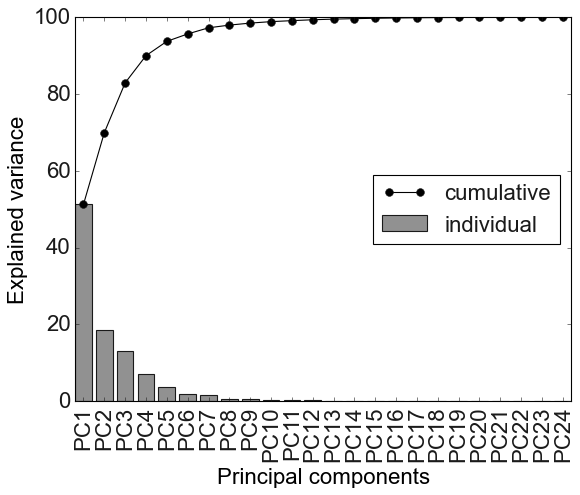

In [69]:
tot = sum(abs(eig_vals[0:n_comps]))
var_exp = [(i / tot)*100 for i in sorted(abs(eig_vals[0:n_comps]), reverse=True)]
cum_var_exp = np.cumsum(var_exp)
var_exp
plot_explained_variance(matlab_dir_str, folder_str_H_MDS, subfolder_str_H_MDS,var_exp,'all_pars_'+PCA_based_on_group,opt_save)

Here, we are reducing the 21-dimensional feature space to a 2-dimensional feature subspace, by choosing the "top 2" eigenvectors with the highest eigenvalues to construct our 𝑑×𝑘-dimensional eigenvector matrix 𝐖.

In [70]:
n_features = len(ratenames)
matrix_w = []
for i in range(0,n_comps):
    matrix_w.append(eig_pairs[i][1].reshape(n_features,1))
matrix_w = np.hstack(matrix_w)
#eigenvectors belonging to highest n_comps eigenvalues


#matrix_w = np.hstack((eig_pairs_red[0][1][0:n_comps].reshape(n_comps,1), 
#                      eig_pairs_red[1][1][0:n_comps].reshape(n_comps,1)))
#eigenvectors belonging to highest 2 eigenvalues
np.shape(matrix_w)
#n_features

(24, 24)

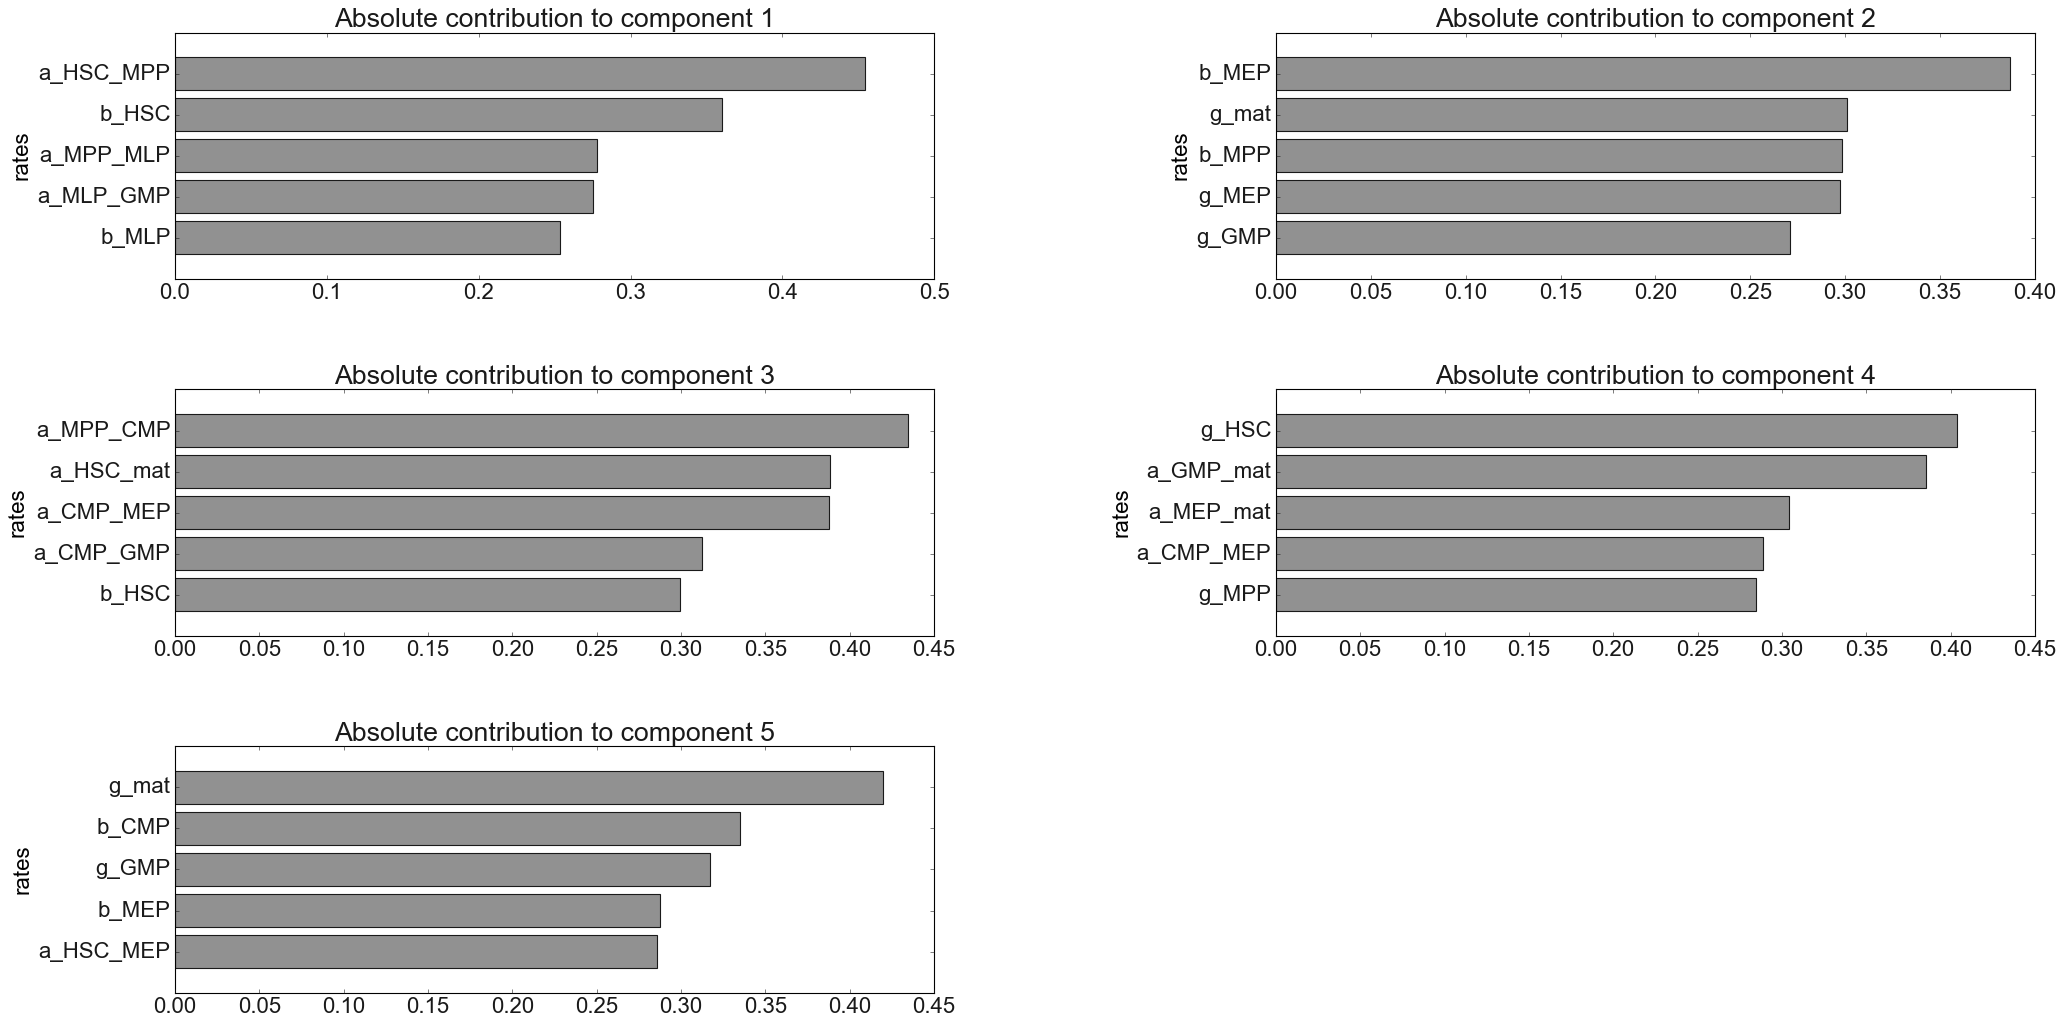

In [71]:
components = np.asarray(matrix_w.T)
method_str = 'PCA'
n_pars=5
add_file_str = 'PCA_based_on_'+PCA_based_on_group
plot_contribution2components(matlab_dir_str,folder_str_H_MDS, subfolder_str_H_MDS, components, 5 ,n_pars,ratenames,add_file_str,method_str,'',opt_save)

In [72]:
np.sort(np.sum(abs(components[0:4]),axis=0))

array([0.4693, 0.4777, 0.5509, 0.5624, 0.5653, 0.5683, 0.5789, 0.5996,
       0.612 , 0.6151, 0.6196, 0.6365, 0.6935, 0.7253, 0.749 , 0.7545,
       0.7595, 0.7817, 0.824 , 0.8379, 0.8481, 0.9038, 0.908 , 0.9169])

In [73]:
sum_absolute = np.sum(abs(components[0:4]),axis=0)
ratenames_sorted = [x for y, x in sorted(zip(sum_absolute, ratenames))]
component_sorted = [abs(x) for y, x in sorted(zip(sum_absolute, components[0]))]
ratenames_sorted
component_sorted

[0.033117666379648004,
 0.15468087532492272,
 0.10315570993497963,
 0.039338952859349706,
 0.1301816081019478,
 0.20428393894178298,
 0.27513581704886303,
 0.1473307793416578,
 0.2778483828354429,
 0.25359291560655195,
 0.18554792837694276,
 0.05809562425155003,
 0.12173671268751772,
 0.1888057437582472,
 0.23705414393441918,
 0.4545304239841119,
 0.36020366234628237,
 0.08506744185660413,
 0.16157007863568124,
 0.15423536997005294,
 0.24690555927953337,
 0.043640322114234166,
 0.13447064255412344,
 0.21518626408245628]

In [74]:
sum_absolute

array([0.7545, 0.5996, 0.5624, 0.7595, 0.9038, 0.7817, 0.612 , 0.9169,
       0.6935, 0.908 , 0.7253, 0.749 , 0.4693, 0.4777, 0.5789, 0.6151,
       0.6365, 0.8379, 0.6196, 0.824 , 0.5683, 0.5653, 0.8481, 0.5509])

In [75]:
plt = loadPltSettings(15,7)
my_cmap = ['#000000','#575757','#8B8B8B', '#D4D4D4']
#if PCA_based_on_group=='CHIP':
#    my_cmap = ['#025F5F',col_CHIP, '#69CBCB', '#DCECEC']
#elif PCA_based_on_group=='MDS':
#    my_cmap = ['#7D1212', col_MDS, '#F28080', '#F9E1E1']   
   
#my_cmap[0]

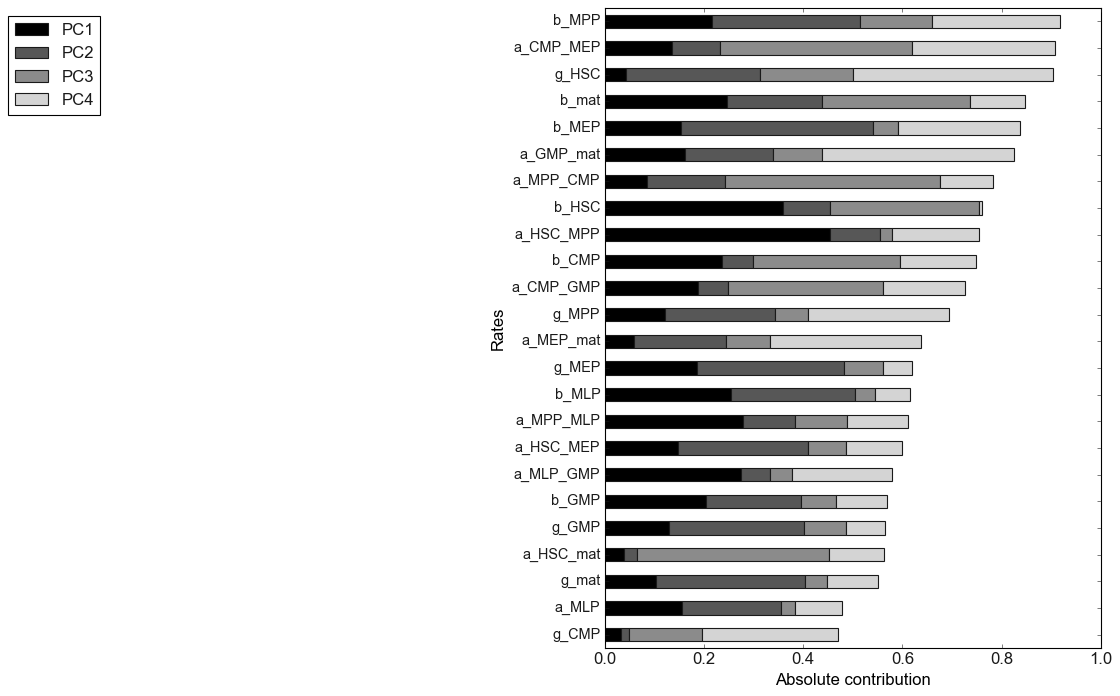

In [76]:
plot_contribution2components_stacked(matlab_dir_str,folder_str_H_MDS, subfolder_str_H_MDS, components, 5 ,n_pars,ratenames,add_file_str,method_str,'',my_cmap,opt_save)

projection onto the new feature space: we will use the 21×2-dimensional projection matrix 𝐖 to transform our samples onto the new subspace via the equation
𝐘=𝐗×𝐖, where 𝐘 is a 31×2 matrix of our transformed samples.

In [141]:
opt_weighted_Ellipse=False
W_H_1 = np.array([])
W_H_2 = np.array([])
Y = X_all_std.dot(matrix_w)

if PCA_based_on_group=='CHIP':
    Y_H_1 = Y[DF['group']=='healthy',:]
    Y_H_2 = Y[DF['group']=='MDS',:]
    opt_ellipse_groups = [1]
elif PCA_based_on_group=='MDS':
    Y_H_1 = Y[DF['group']=='healthy',:]
    Y_H_2 = Y[DF['group']=='CHIP',:]
    opt_ellipse_groups = [1]
elif PCA_based_on_group=='healthy':
    Y_H_1 = Y[DF['group']=='CHIP',:]
    Y_H_2 = Y[DF['group']=='MDS',:]  
    opt_ellipse_groups = []
comparison_str='Disease status '+PCA_based_on_group
#Y = Y[DF['group']==PCA_based_on_group,:]
if opt_weighted_Ellipse==True:
    W_H_1 = np.sum((np.resize(np.average(W_H,weights=abs(components[0]),axis=1),[np.shape(X_H)[0],1]),np.resize(np.average(W_H,weights=abs(components[1]),axis=1),[np.shape(X_H)[0],1])),axis=0)

In [142]:
np.shape(Y)

(25, 24)

In [143]:
bool_plotIDs =True# False #

In [144]:
plt = loadPltSettings(18,200)

In [145]:
os.chdir(dir_str)
#os.getcwd()
%run "definedFunctions.ipynb"

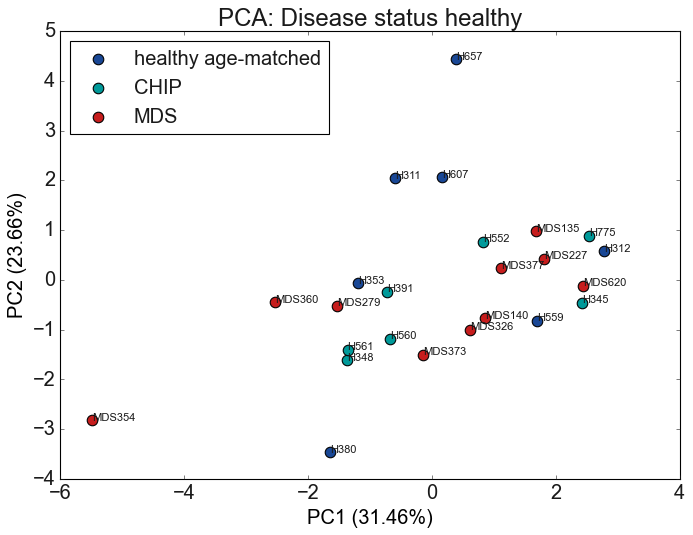

In [146]:
confidence_level = [0.85,0.95]

#labels:
#comparison_str='Disease status age-matched'
#groups = ('healthy age-matched','CHIP','MDS')
#groups_colors = [('healthy age-matched', col_H_a),('CHIP', col_CHIP),('MDS', col_MDS)]

#s,y = getValues4PCAplot(comparison_str,DF,groups,opt_sample_ID)
legend_loc = "upper left"
IDX_PCs=[0,1]
plot_PCA_2D_projection(matlab_dir_str, folder_str_H_MDS, subfolder_str_H_MDS,Y,Y_H_1,Y_H_2,var_exp,comparison_str,bool_plotIDs,IDX_PCs,add_file_str,legend_loc,W_H_1,W_H_2,confidence_level,opt_ellipse_groups,opt_save)


['BM hip replacement', 'BM puncture']


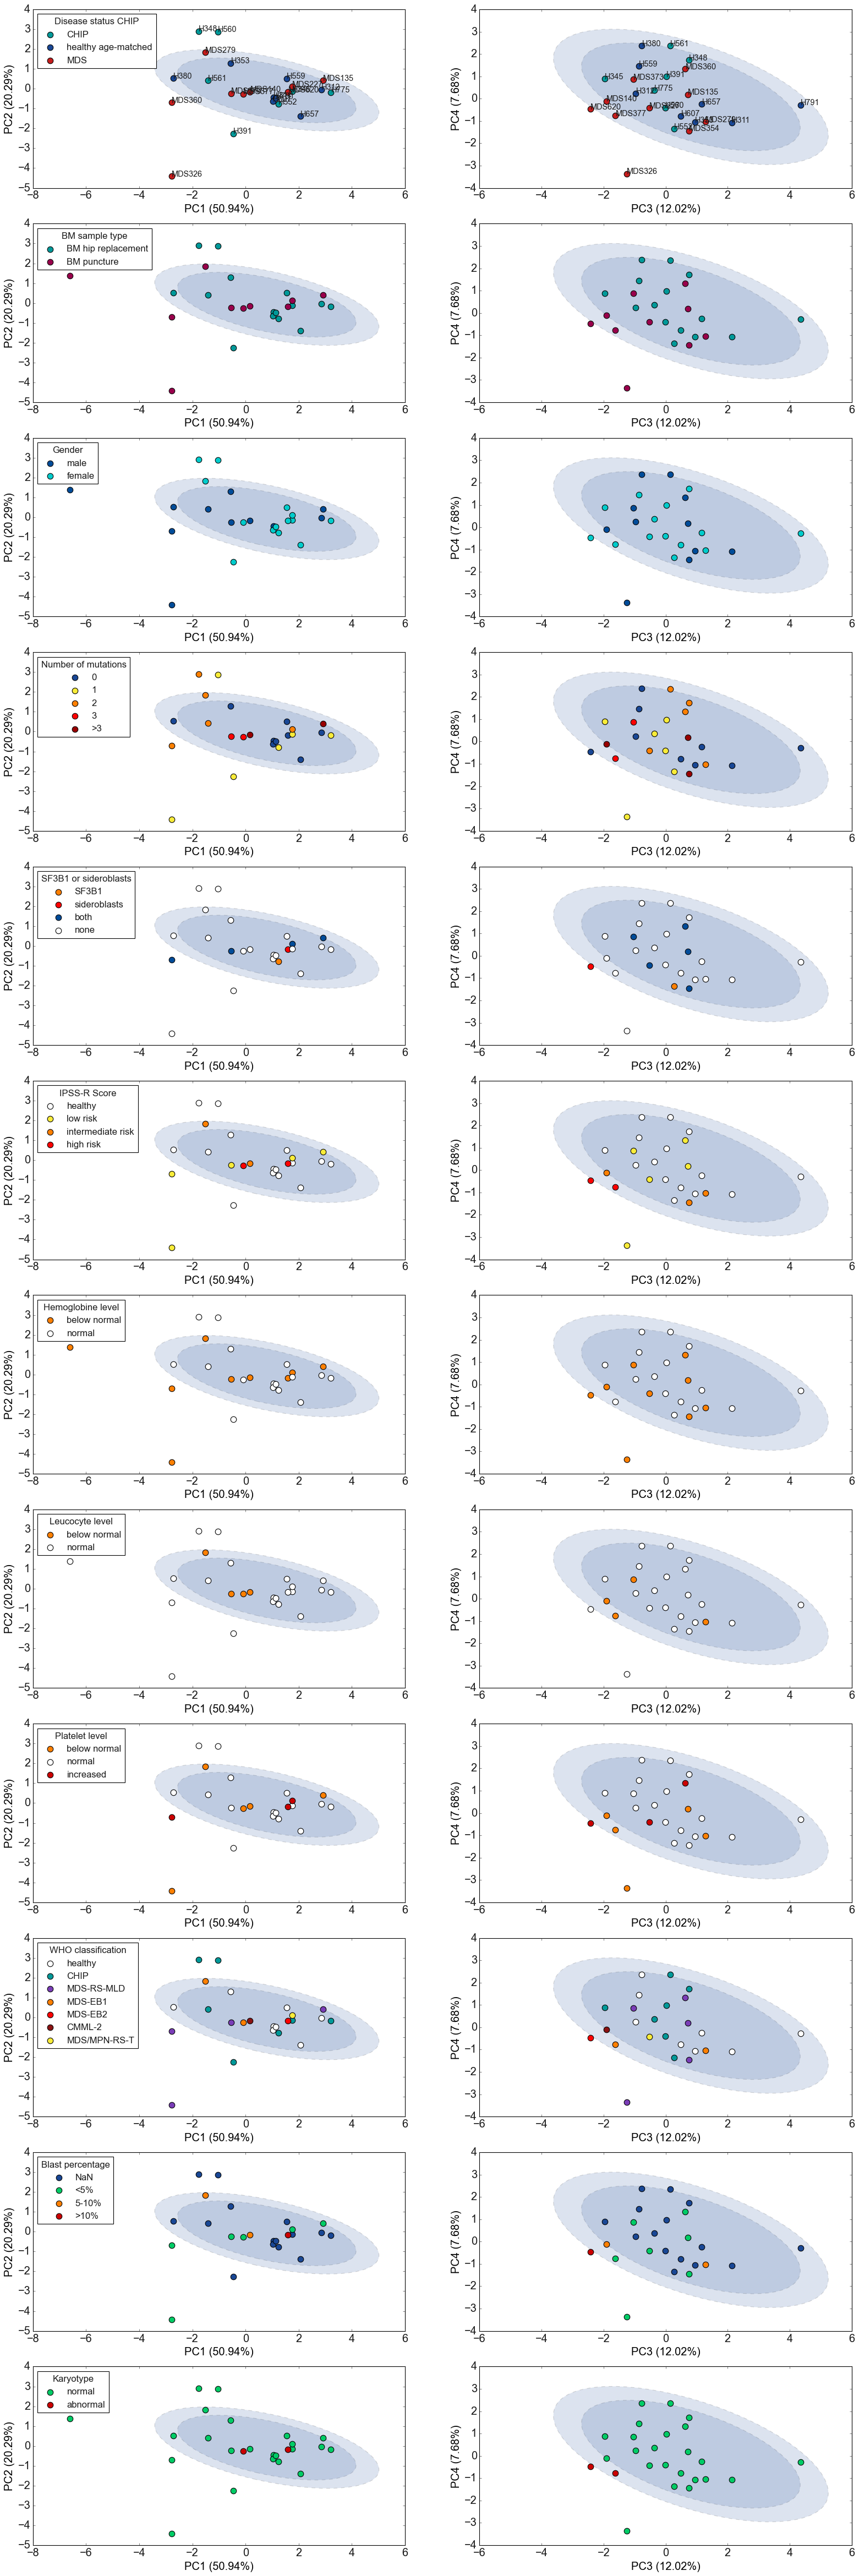

In [344]:
donor_data_variables = ['Disease status '+PCA_based_on_group, 'BM sample type', 'Gender', 'Number of mutations','SF3B1 or sideroblasts','IPSS-R Score','Hemoglobine level','Leucocyte level','Platelet level','WHO classification','Blast percentage','Karyotype']
donor_data_variables[0] = comparison_str
IDX_PCs=[[0,1],[2,3]]
bool_plotIDs=True
plot_PCA_2D_projection(matlab_dir_str, folder_str_H_MDS, subfolder_str_H_MDS,Y,Y_H_1,Y_H_2,var_exp,donor_data_variables,bool_plotIDs,IDX_PCs,add_file_str,legend_loc,W_H_1,W_H_2,confidence_level,opt_ellipse_groups,opt_save)

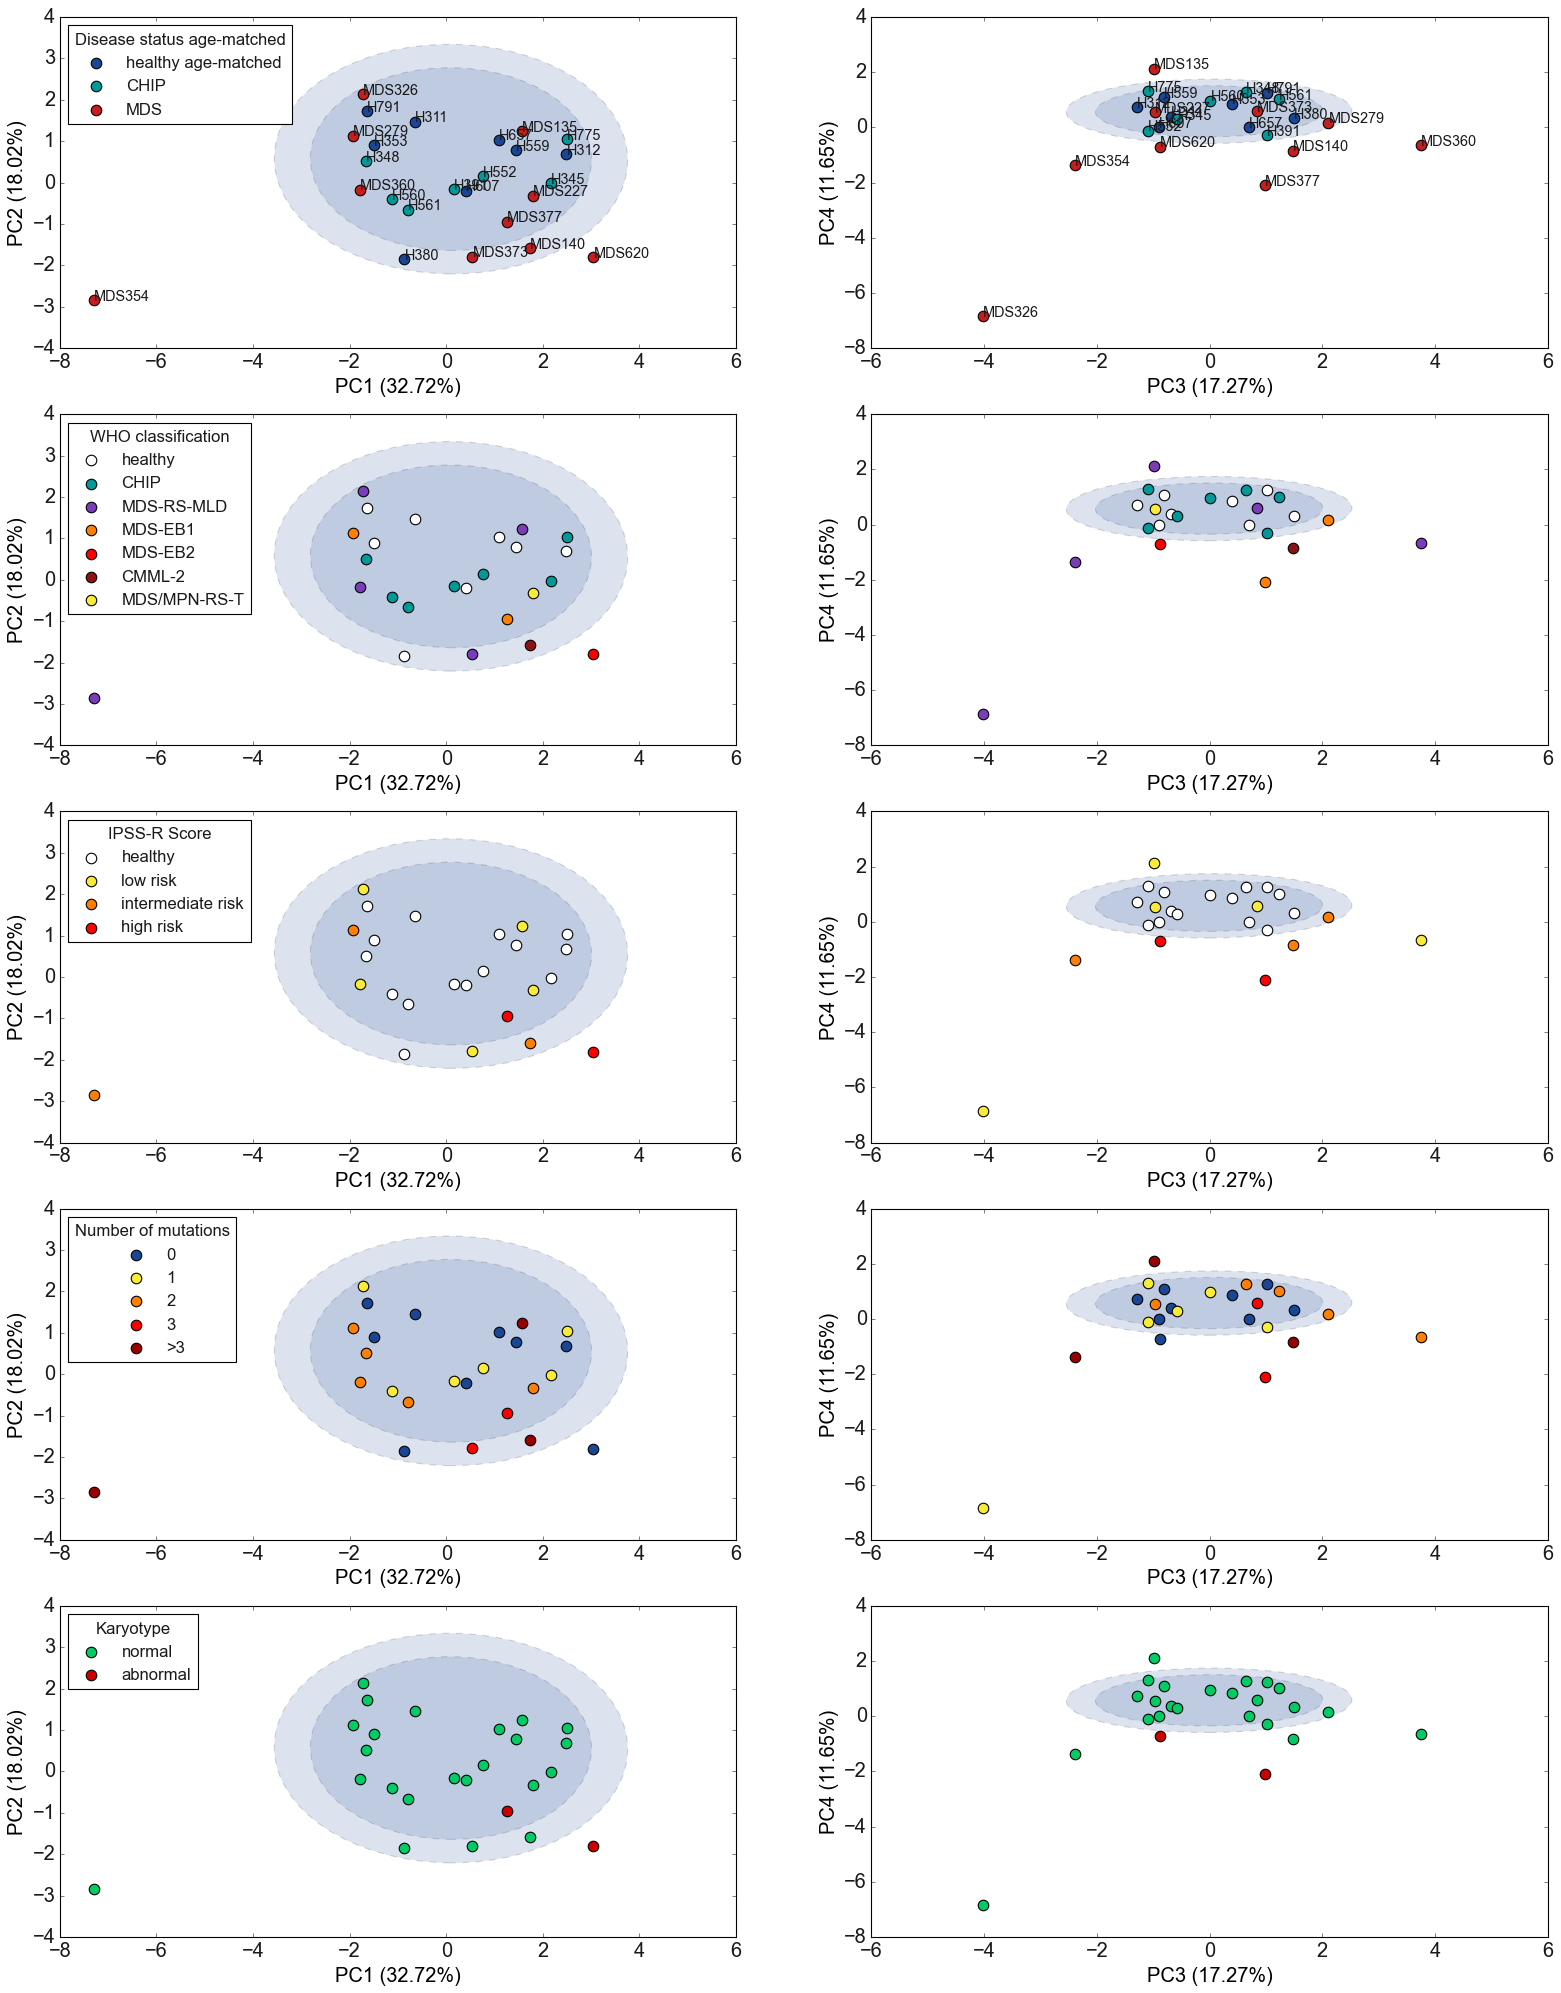

In [132]:
donor_data_variables = ['Disease status', 'WHO classification','IPSS-R Score','Number of mutations','Karyotype']
donor_data_variables[0] = comparison_str
IDX_PCs=[[0,1],[2,3]]
bool_plotIDs=True
plot_PCA_2D_projection(matlab_dir_str, folder_str_H_MDS, subfolder_str_H_MDS,Y,Y_H_1,Y_H_2,var_exp,donor_data_variables,bool_plotIDs,IDX_PCs,add_file_str,legend_loc,W_H_1,W_H_2,confidence_level,opt_ellipse_groups,opt_save)

In [133]:
#opt_mutation='combined'
#FS=20
#plot_PCA_2D_projection_allMutations(matlab_dir_str,folder_str_H_MDS,subfolder_str_H_MDS,DF,Y,Y_H_1,Y_H_2,var_exp,opt_mutation,bool_plotIDs,bool_only_age_matched,IDX_PCs,add_file_str,legend_loc,opt_sample_ID,W_H_1,W_H_2,confidence_level,opt_save)

In [134]:
np.shape(Y_H_2)

(8, 24)

In [135]:
Y_H_2[:,0:2]

matrix([[-0.648 ,  1.4644],
        [ 2.4882,  0.6849],
        [-1.4878,  0.8976],
        [-0.8651, -1.8539],
        [ 1.4343,  0.7822],
        [ 0.4128, -0.2045],
        [ 1.0906,  1.0317],
        [-1.6453,  1.7271]])

In [136]:
S = np.empty_like(IDX_PCs)
M = np.empty_like(IDX_PCs)
for i,idx in enumerate(IDX_PCs):
    S[i] = np.std(Y_H_2[:,idx])
    M[i] = np.mean(Y_H_2[:,idx])
M

array([[0, 0],
       [0, 0]])

In [137]:
bool_plotIDs =False #

In [138]:
os.chdir(dir_str)
#os.getcwd()
%run "definedFunctions.ipynb"

In [139]:
#labels:
#comparison_str = 'BM sample type'
#plot_PCA_2D_projection(matlab_dir_str, folder_str_H_MDS, subfolder_str_H_MDS,Y,Y_H_1,Y_H_2,comparison_str,bool_plotIDs,bool_only_age_matched,IDX_PCs,add_file_str,legend_loc,W_H_1,W_H_2,confidence_level,opt_save)

In [140]:
#labels:
#comparison_str = 'Gender'
#plot_PCA_2D_projection(matlab_dir_str, folder_str_H_MDS, subfolder_str_H_MDS,Y,Y_H_1,Y_H_2,comparison_str,bool_plotIDs,bool_only_age_matched,IDX_PCs,add_file_str,legend_loc,W_H_1,W_H_2,confidence_level,opt_save)

In [141]:
#labels:
#comparison_str = 'Number of mutations'
#plot_PCA_2D_projection(matlab_dir_str, folder_str_H_MDS, subfolder_str_H_MDS,Y,Y_H_1,Y_H_2,comparison_str,bool_plotIDs,bool_only_age_matched,IDX_PCs,add_file_str,legend_loc,W_H_1,W_H_2,confidence_level,opt_save)

In [142]:
#DF[['Sample_ID','Mutation_counts']]

In [143]:
#comparison_str = 'SF3B1_or_sideroblasts'
#plot_PCA_2D_projection(matlab_dir_str, folder_str_H_MDS, subfolder_str_H_MDS,Y,Y_H_1,Y_H_2,comparison_str,bool_plotIDs,bool_only_age_matched,IDX_PCs,add_file_str,legend_loc,W_H_1,W_H_2,confidence_level,opt_save)


UnboundLocalError: local variable 'groups' referenced before assignment

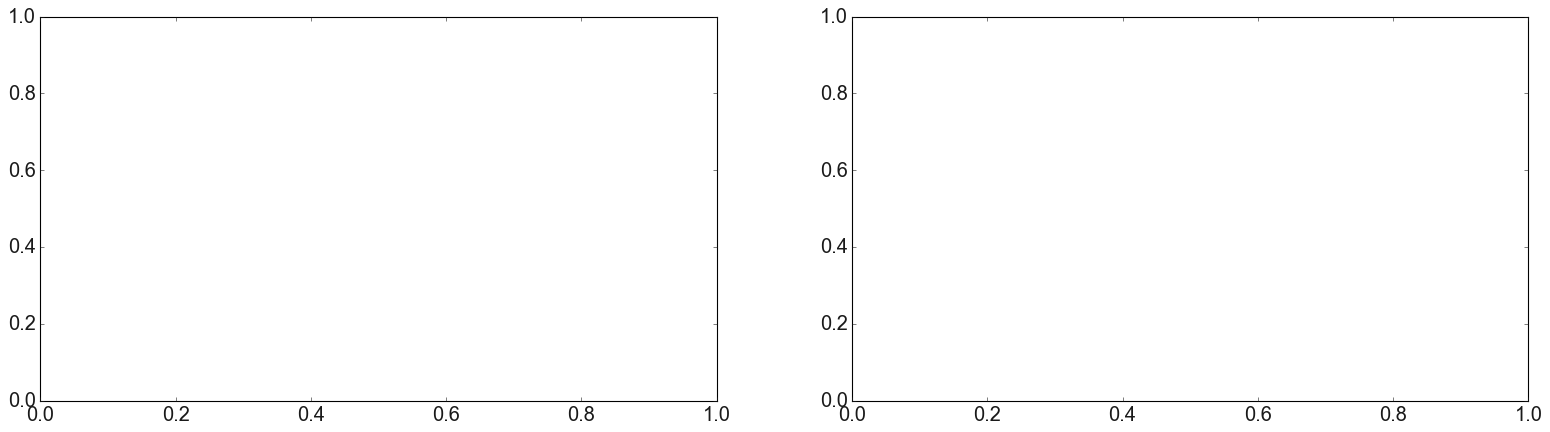

In [144]:
#for m_id in range(0,len(mutation_str)):
opt_mutation ='combined'
m_id=1
if opt_mutation == 'bulk':
    mut_ending = '_B'        
else:
    mut_ending = '_S'
mutation_str = df_PD.columns[df_PD.columns.str.endswith(mut_ending)]
if opt_mutation == 'combined':
    m_str = [mut_str[:-2] for mut_str in mutation_str]
    mutation_str = m_str
    
comparison_str, groups, groups_colors, y, s= get_mutation_labels(DF,mutation_str,m_id,opt_sample_ID)

plot_PCA_2D_projection(matlab_dir_str, folder_str_H_MDS, subfolder_str_H_MDS,Y,Y_H_1,Y_H_2,s,comparison_str,bool_plotIDs,bool_only_age_matched,IDX_PCs,add_file_str,legend_loc,W_H_1,W_H_2,confidence_level,opt_save)

In [ ]:
#labels:
#needs an update!!
#comparison_str = 'parameter result'
#groups=('normal','increased proliferation', 'decreased progenitor proliferation')
#groups_colors=[('normal','#00CC66'),('increased proliferation','#6600CC'),('decreased progenitor proliferation','#FF8000')]
#s,y = getValues4PCAplot(comparison_str,DF,groups,opt_sample_ID)
#plot_PCA_2D_projection(matlab_dir_str, folder_str_H_MDS, subfolder_str_H_MDS,Y,Y_H_1,Y_H_2,y,s,groups,groups_colors,comparison_str,bool_plotIDs,bool_only_age_matched,IDX_PCs,add_file_str,legend_loc,W_H_1,W_H_2,confidence_level,opt_save)

### Model fits

In [ ]:
#plt = loadPltSettings(30,10)

In [ ]:
#plotModelFitToData(matlab_dir_str,folder_str_H_MDS,subfolder_str_H_MDS,subsubfolder_str_H_MDS,CT,cols_CT,False,opt_save)